#Comparison of publicly available skin lesion datasets.

In this notebook, we present the comparison among the following datasets:


*   Hospital Italiano de Buenos Aires Skin Lesions Images (2019-2022) Dataset [1]
*   ISIC Challenge 2019 Dataset [2-4]
*   ISIC Challenge 2020 Dataset [5]
*   PAD-UFES-20 Dataset [6]

All datasets can be downloaded from the [ISIC Archive](https://www.isic-archive.com) using [isic-cli](https://github.com/ImageMarkup/isic-cli), with the exception of the PAD-UFES-20 dataset which has to be downloaded from [Mendeley Data](https://data.mendeley.com/datasets/zr7vgbcyr2/1).

**References**

[1] *27.	Hospital Italiano de Buenos Aires - Skin Lesions Images (2019-2022). International Skin Imaging Collaboration https://doi.org/10.34970/587329 (2023)*

[2] *Tschandl, P., Rosendahl, C., & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data. 5, 180161 (2018). https://doi.org/10.1038/sdata.2018.161*

[3] *Codella, N. C., et al. Skin Lesion Analysis Toward Melanoma Detection: a Challenge at the 2017 International Symposium on Biomedical Imaging (ISBI), hosted by the International Skin Imaging Collaboration (ISIC). In 2018 IEEE 15th international symposium on biomedical imaging (ISBI 2018) Pp. 168-172 (IEEE, 2018).*

[4] *Combalia, M., et al. Bcn20000: Dermoscopic lesions in the wild. Preprint at https://arxiv.org/abs/1908.02288 (2019).*

[5] *Rotemberg, V., Kurtansky, N., Betz-Stablein, B. et al. A patient-centric dataset of images and metadata for identifying melanomas using clinical context. Sci. Data. 8, 34 (2021). https://doi.org/10.1038/s41597-021-00815-z*

[6] *Pacheco, A. G., et al. PAD-UFES-20: A skin lesion dataset composed of patient data and clinical images collected from smartphones. Data Brief. 32, 106221 (2020).*





##Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
!pip install isic-cli

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00


##Datasets download/upload

In [ ]:
os.makedirs('./Data', exist_ok=True)

In [ ]:
!isic collection list

Psst, you're logged out. Logging in with `isic user login` might return more data.

┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ ID  ┃ Name                      ┃ Public ┃ Pinned ┃ Locked ┃ DOI             ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 249 │ BCN20000                  │ True   │ False  │ False  │ None            │
│ 61  │ Challenge 2016: Test      │ True   │ True   │ True   │ None            │
│ 74  │ Challenge 2016: Training  │ True   │ True   │ True   │ None            │
│ 69  │ Challenge 2017: Test      │ True   │ True   │ True   │ None            │
│ 60  │ Challenge 2017: Training  │ True   │ True   │ True   │ None            │
│ 71  │ Challenge 2017:           │ True   │ True   │ True   │ None            │
│     │ Validation                │        │        │        │                 │
│ 64  │ Challenge 2018: Task 1-2: │ True   │ True   │ True   │ None            │
│     │ Test             

Collections stored in ISIC Archive can be downloaded through isic-cli

In [ ]:
!isic metadata download -c 65 -o ./Data/ISIC_Challenge_2019.csv

Psst, you're logged out. Logging in with `isic user login` might return more data.



In [ ]:
!isic metadata download -c 70 -o ./Data/ISIC_Challenge_2020.csv

Psst, you're logged out. Logging in with `isic user login` might return more data.



In [ ]:
!isic metadata download -c 251 -o ./Data/HIBA_Skin_Lesions.csv

Psst, you're logged out. Logging in with `isic user login` might return more data.



PAD-UFES-20 dataset metadata (metadata.csv) has to be downloaded from [Mendeley Data](https://data.mendeley.com/datasets/zr7vgbcyr2/1) and uploaded to /Data

In [ ]:
isic19 = pd.read_csv('./Data/ISIC_Challenge_2019.csv')
isic20 = pd.read_csv('./Data/ISIC_Challenge_2020.csv')
padufes = pd.read_csv('./Data/metadata.csv')
hiba = pd.read_csv('./Data/HIBA_Skin_Lesions.csv')

<ipython-input-92-ab7681b6e97c>:2: DtypeWarning: Columns (8,11,15,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  isic20 = pd.read_csv('./Data/ISIC_Challenge_2020.csv')


In [ ]:
isic19.head(3)

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,dermoscopic_type,diagnosis,diagnosis_confirm_type,family_hx_mm,image_type,lesion_id,melanocytic,nevus_type,personal_hx_mm,pixels_x,pixels_y,sex
0,ISIC_0073254,Hospital Clínic de Barcelona,CC-BY-NC,50.0,upper extremity,NaN,NaN,NaN,seborrheic keratosis,histopathology,NaN,dermoscopic,IL_5135481,False,NaN,NaN,1024,1024,male
1,ISIC_0073251,Hospital Clínic de Barcelona,CC-BY-NC,55.0,palms/soles,benign,NaN,NaN,nevus,histopathology,NaN,dermoscopic,IL_2134464,True,NaN,NaN,1024,1024,female
2,ISIC_0073249,Hospital Clínic de Barcelona,CC-BY-NC,70.0,lower extremity,malignant,NaN,NaN,melanoma,histopathology,NaN,dermoscopic,IL_4888325,True,NaN,NaN,1024,1024,male


In [ ]:
isic20.head(3)

,isic_id,attribution,copyright_license,acquisition_day,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,dermoscopic_type,diagnosis,...,mel_thick_mm,mel_type,mel_ulcer,melanocytic,nevus_type,patient_id,personal_hx_mm,pixels_x,pixels_y,sex
0,ISIC_4120704,"Department of Dermatology, Hospital Clínic de ...",CC-BY-NC,NaN,50.0,palms/soles,benign,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,IP_8759634,NaN,1872,1053,female
1,ISIC_7245999,"Department of Dermatology, Hospital Clínic de ...",CC-BY-NC,NaN,40.0,lower extremity,benign,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,IP_9102359,NaN,1872,1053,male
2,ISIC_2996668,"Department of Dermatology, Hospital Clínic de ...",CC-BY-NC,NaN,45.0,oral/genital,benign,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,IP_8020102,NaN,640,480,male


In [ ]:
padufes.head(3)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False


In [ ]:
hiba.head(3)

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,dermoscopic_type,diagnosis,diagnosis_confirm_type,family_hx_mm,image_type,lesion_id,patient_id,personal_hx_mm,pixels_x,pixels_y,sex
0,ISIC_6230191,Hospital Italiano de Buenos Aires,CC-BY,25.0,anterior torso,malignant,contact polarized,melanoma,histopathology,NaN,dermoscopic,IL_8124990,IP_8542863,True,640,480,male
1,ISIC_4485929,Hospital Italiano de Buenos Aires,CC-BY,65.0,anterior torso,benign,contact polarized,seborrheic keratosis,NaN,NaN,dermoscopic,IL_1921228,IP_9326183,True,2448,2448,female
2,ISIC_3079785,Hospital Italiano de Buenos Aires,CC-BY,45.0,lower extremity,benign,contact polarized,nevus,histopathology,False,dermoscopic,IL_3797557,IP_4906546,False,640,480,male


##General description

In [ ]:
datasets = dict()
datasets['ISIC_19'] = isic19
datasets['ISIC_20'] = isic20
datasets['PADUFES_20'] = padufes
datasets['HIBA'] = hiba

In [ ]:
print('NUMBER OF IMAGES\n')

for ds in datasets.keys():
  print('%s > %d' %(ds,len(datasets[ds])))

NUMBER OF IMAGES

ISIC_19 > 25331
ISIC_20 > 33126
PADUFES_20 > 2298
HIBA > 1616


In [ ]:
print('NUMBER OF UNIQUE LESIONS\n')

for ds in datasets.keys():
  id_lesions = len(datasets[ds].lesion_id.unique())
  try:
    nan_lesions = datasets[ds].lesion_id.value_counts(dropna=False)[np.nan]
    print('%s > %d lesions identified and %d images without lesion_id' %(ds,id_lesions,nan_lesions))
  except:
    print('%s > %d lesions identified' %(ds,id_lesions))

NUMBER OF UNIQUE LESIONS

ISIC_19 > 3577 lesions identified and 12918 images without lesion_id
ISIC_20 > 32701 lesions identified
PADUFES_20 > 1641 lesions identified
HIBA > 1246 lesions identified


In [ ]:
print('NUMBER OF UNIQUE PATIENTS\n')

for ds in datasets.keys():
  if ds=='ISIC_19': #isic19 has no 'patient_id' key
     print('%s > %d images without patient_id' %(ds,len(datasets[ds])))
  else:
    id_patients = len(datasets[ds].patient_id.unique())
    try:
      nan_patients = datasets[ds].patient_id.value_counts(dropna=False)[np.nan]
      print('%s > %d patients identified and %d images without patient_id' %(ds,id_patients,nan_patients))
    except:
      print('%s > %d patients identified' %(ds,id_patients))

NUMBER OF UNIQUE PATIENTS

ISIC_19 > 25331 images without patient_id
ISIC_20 > 2056 patients identified
PADUFES_20 > 1373 patients identified
HIBA > 623 patients identified


##Age

In [ ]:
color_palette=['#DBFAB7','#B7D9FA','#FAEAB7', '#FAB7E0']

Age distribution (IMAGE ANALYSIS)

ISIC_19
 Image/s with age_approx informed:  24849
 Corresponding %:  98.09719316252813

 Image/s without age_approx informed:  482
 Corresponding %:  1.9028068374718723

 Images age_approx statistics ---> MIN 0.0 | MAX 85.0 | MEAN 54.12632299086482 | SD 18.00087247488851


ISIC_20
 Image/s with age_approx informed:  33058
 Corresponding %:  99.79472317816821

 Image/s without age_approx informed:  68
 Corresponding %:  0.20527682183179374

 Images age_approx statistics ---> MIN 0.0 | MAX 85.0 | MEAN 48.66764474559864 | SD 14.332029408627943


PADUFES_20
 Image/s with age_approx informed:  2298
 Corresponding %:  100.0

 Images age_approx statistics ---> MIN 6.0 | MAX 94.0 | MEAN 60.46475195822455 | SD 15.894866347034222


HIBA
 Image/s with age_approx informed:  1611
 Corresponding %:  99.69059405940595

 Image/s without age_approx informed:  5
 Corresponding %:  0.3094059405940594

 Images age_approx statistics ---> MIN 20.0 | MAX 85.0 | MEAN 59.6151

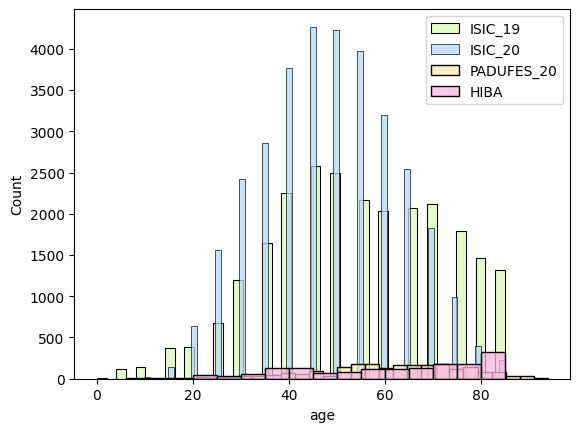

In [ ]:
print('Age distribution (IMAGE ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  print(ds)
  df= datasets[ds]
  if ds!='PADUFES_20':
    df.rename(columns={'age_approx':'age'}, inplace=True)

  df.age = df.age.replace('', np.nan)
  df.age = df.age.astype('float')
  try:
    print(' Image/s with age_approx informed: ', df.age.value_counts().sum())
    print(' Corresponding %: ', (df.age.value_counts().sum()/len(df)*100))

    print('\n Image/s without age_approx informed: ', df.age.value_counts(dropna=False)[np.nan])
    print(' Corresponding %: ', (df.age.value_counts(dropna=False)[np.nan]/len(df)*100))
  except:
    pass

  print(f'\n Images age_approx statistics ---> MIN {df.age.min()} | MAX {df.age.max()} | MEAN {df.age.mean()} | SD {df.age.std()}\n\n')

  ax1 = sns.histplot(df.age, color=color_palette[i], label=ds)
  ax1.legend()

Age distribution (PATIENT ANALYSIS)

ISIC_20
 Patient/s with age_approx informed:  2053
 Corresponding %:  99.85408560311284

 Patient/s without age_approx informed:  3
 Corresponding %:  0.14591439688715954

 Patient age_approx statistics ---> MIN 0.0 | MAX 85.0 | MEAN 51.371164150024356 | SD 14.876279457770774


PADUFES_20
 Patient/s with age_approx informed:  1373
 Corresponding %:  100.0

 Patient age_approx statistics ---> MIN 6.0 | MAX 94.0 | MEAN 59.081573197378006 | SD 16.130997625804568


HIBA
 Patient/s with age_approx informed:  618
 Corresponding %:  99.19743178170144

 Patient/s without age_approx informed:  5
 Corresponding %:  0.8025682182985553

 Patient age_approx statistics ---> MIN 20.0 | MAX 85.0 | MEAN 62.127831715210355 | SD 17.34981404738759




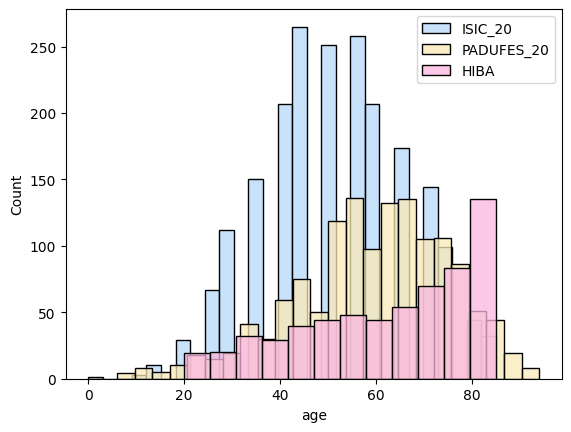

In [ ]:
print('Age distribution (PATIENT ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  try:
    df= datasets[ds].copy()
    df.drop_duplicates(['patient_id'], inplace=True)
    print(ds)
    if ds!='PADUFES_20':
      df.rename(columns={'age_approx':'age'}, inplace=True)

    df.age = df.age.replace('', np.nan)
    df.age = df.age.astype('float')
    try:
      print(' Patient/s with age_approx informed: ', df.age.value_counts().sum())
      print(' Corresponding %: ', (df.age.value_counts().sum()/len(df)*100))
      print('\n Patient/s without age_approx informed: ', df.age.value_counts(dropna=False)[np.nan])
      print(' Corresponding %: ', (df.age.value_counts(dropna=False)[np.nan]/len(df)*100))
    except:
      pass

    print(f'\n Patient age_approx statistics ---> MIN {df.age.min()} | MAX {df.age.max()} | MEAN {df.age.mean()} | SD {df.age.std()}\n\n')

    ax1 = sns.histplot(df.age, color=color_palette[i], label=ds)
    ax1.legend()
  except:
    pass

##Sex

Sex distribution (IMAGE ANALYSIS)

ISIC_19
 Image/s with sex informed:  24947
 Corresponding %:  98.48407090126722

 Image/s without sex informed:  384
 Corresponding %:  1.515929098732778


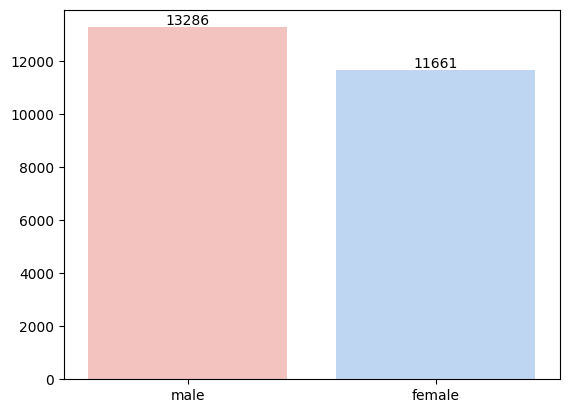

ISIC_20
 Image/s with sex informed:  33061
 Corresponding %:  99.80377950854313

 Image/s without sex informed:  65
 Corresponding %:  0.19622049145686168


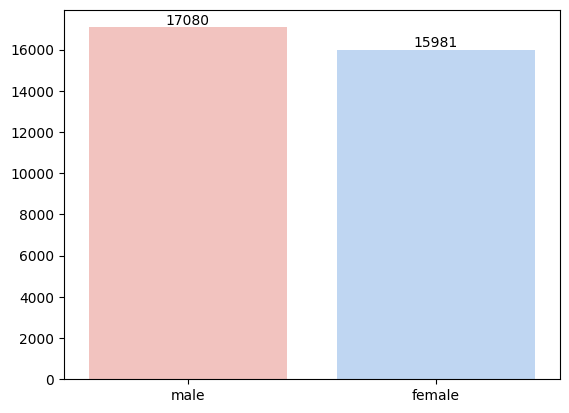

PADUFES_20
 Image/s with sex informed:  1494
 Corresponding %:  65.0130548302872

 Image/s without sex informed:  804
 Corresponding %:  34.9869451697128


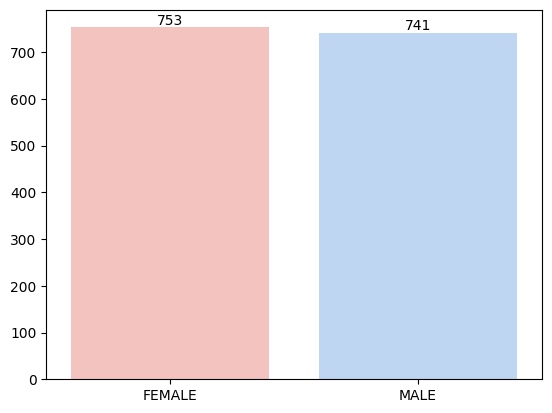

HIBA
 Image/s with sex informed:  1611
 Corresponding %:  99.69059405940595

 Image/s without sex informed:  5
 Corresponding %:  0.3094059405940594


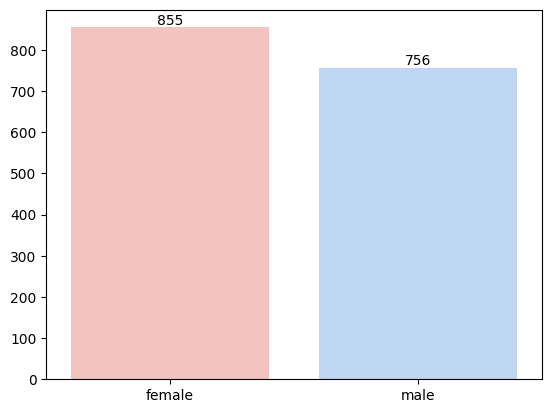

In [ ]:
print('Sex distribution (IMAGE ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):

  df= datasets[ds]
  if ds =='PADUFES_20':
    df.rename(columns={'gender':'sex'}, inplace=True)

  print(ds)

  df.sex = df.sex.replace('', np.nan)

  try:
    print(' Image/s with sex informed: ', df.sex.value_counts().sum())
    print(' Corresponding %: ', (df.sex.value_counts().sum()/len(df)*100))
    print('\n Image/s without sex informed: ', df.sex.value_counts(dropna=False)[np.nan])
    print(' Corresponding %: ', (df.sex.value_counts(dropna=False)[np.nan]/len(df)*100))
  except:
    pass

  ax = sns.barplot(x=df.sex.value_counts(dropna=False).keys(), y=df.sex.value_counts(dropna=False).values, data=df, palette=['#FABCB7', '#B7D5FA'])
  _ = ax.bar_label(ax.containers[0])
  plt.show()

Sex distribution (PATIENT ANALYSIS)

ISIC_20

 Patient/s with sex informed:  2054
 Corresponding %:  99.90272373540856

 Patient/s without sex informed:  2
 Corresponding %:  0.09727626459143969


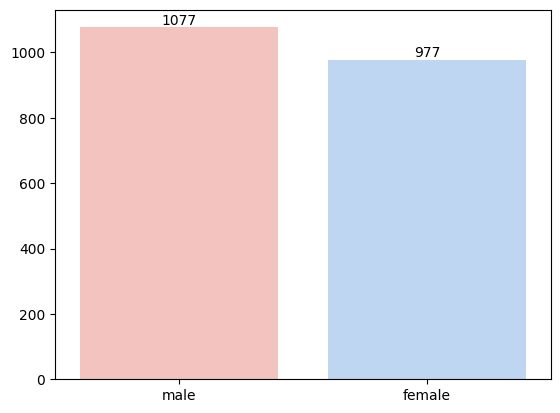

PADUFES_20

 Patient/s with sex informed:  794
 Corresponding %:  57.829570284049524

 Patient/s without sex informed:  579
 Corresponding %:  42.170429715950476


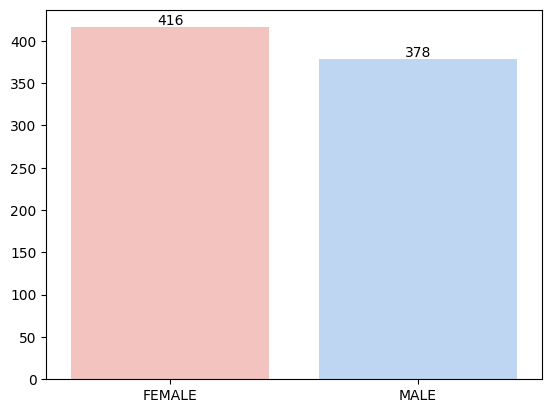

HIBA

 Patient/s with sex informed:  621
 Corresponding %:  99.67897271268058

 Patient/s without sex informed:  2
 Corresponding %:  0.32102728731942215


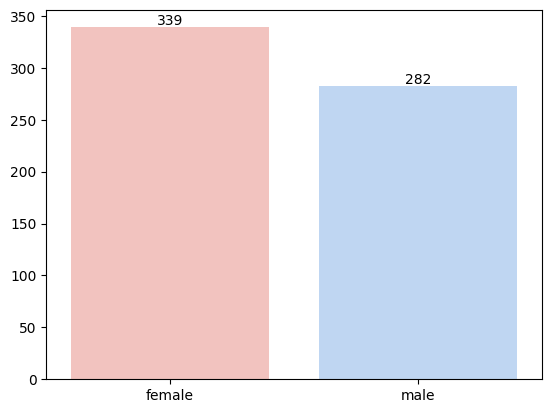

In [ ]:
print('Sex distribution (PATIENT ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  try:
    df= datasets[ds].copy()
    df.drop_duplicates(['patient_id'], inplace=True)
    print(ds)

    if ds =='PADUFES_20':
      df.rename(columns={'gender':'sex'}, inplace=True)


    df.sex = df.sex.replace('', np.nan)
    try:
      print('\n Patient/s with sex informed: ', df.sex.value_counts().sum())
      print(' Corresponding %: ', (df.sex.value_counts().sum()/len(df)*100))
      print('\n Patient/s without sex informed: ', df.sex.value_counts(dropna=False)[np.nan])
      print(' Corresponding %: ', (df.sex.value_counts(dropna=False)[np.nan]/len(df)*100))
    except:
      pass

    ax = sns.barplot(x=df.sex.value_counts(dropna=False).keys(), y=df.sex.value_counts(dropna=False).values, data=df, palette=['#FABCB7', '#B7D5FA'])
    _ = ax.bar_label(ax.containers[0])
    plt.show()
  except:
    pass

##Skin Tone

Hospital Italiano de Buenos Aires Skin Lesions Images (2019-2022) Dataset information regarding skin tone is available as a csv file (/Data/SupplementaryData.csv) in the [github repository](https://github.com/piashiba/HIBASkinLesionsDataset).

In [ ]:
sup_data = pd.read_csv('./Data/SupplementaryData.csv')
sup_data.head(2)

,isic_id,skin_type
0,ISIC_6230191,II
1,ISIC_4485929,I


In [ ]:
hiba2 = hiba.merge(sup_data, on='isic_id')
hiba2.head()

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,dermoscopic_type,diagnosis,diagnosis_confirm_type,family_hx_mm,image_type,lesion_id,patient_id,personal_hx_mm,pixels_x,pixels_y,sex,skin_type
0,ISIC_6230191,Hospital Italiano de Buenos Aires,CC-BY,25.0,anterior torso,malignant,contact polarized,melanoma,histopathology,NaN,dermoscopic,IL_8124990,IP_8542863,True,640,480,male,II
1,ISIC_4485929,Hospital Italiano de Buenos Aires,CC-BY,65.0,anterior torso,benign,contact polarized,seborrheic keratosis,NaN,NaN,dermoscopic,IL_1921228,IP_9326183,True,2448,2448,female,I
2,ISIC_3079785,Hospital Italiano de Buenos Aires,CC-BY,45.0,lower extremity,benign,contact polarized,nevus,histopathology,False,dermoscopic,IL_3797557,IP_4906546,False,640,480,male,II
3,ISIC_9677008,Hospital Italiano de Buenos Aires,CC-BY,30.0,posterior torso,malignant,contact polarized,melanoma,histopathology,NaN,dermoscopic,IL_3556705,IP_5493434,True,1409,2900,female,II
4,ISIC_9129115,Hospital Italiano de Buenos Aires,CC-BY,75.0,posterior torso,benign,NaN,actinic keratosis,histopathology,NaN,clinical: overview,IL_2485486,IP_8947694,NaN,498,1026,female,II


In [ ]:
#Update dictionary value for HIBA key
datasets['HIBA'] = hiba2

Skin Tone distribution (IMAGE ANALYSIS)

PADUFES_20
 Image/s with skin tone informed:  1494
 Corresponding %:  65.0130548302872

 Image/s without skin tone informed:  804
 Corresponding %:  34.9869451697128


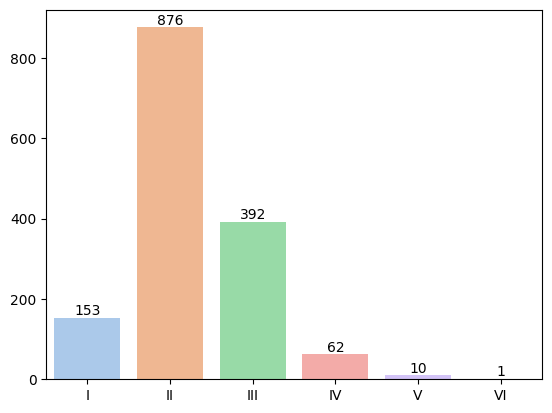

HIBA
 Image/s with skin tone informed:  1499
 Corresponding %:  92.75990099009901

 Image/s without skin tone informed:  117
 Corresponding %:  7.240099009900989


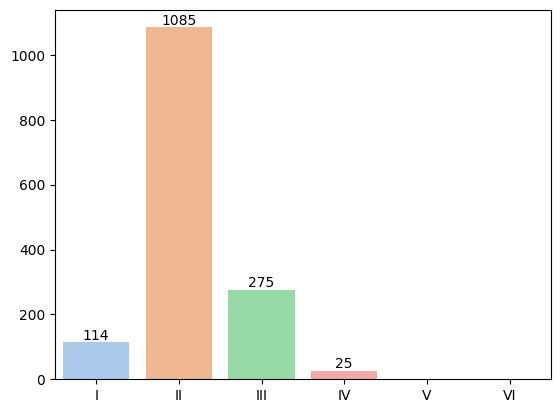

In [ ]:
print('Skin Tone distribution (IMAGE ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  try:
    if 'ISIC' not in ds:
      df= datasets[ds].copy()
      print(ds)
      if ds =='PADUFES_20':
        df.rename(columns={'fitspatrick':'skin_type'}, inplace=True)
        df.skin_type = df.skin_type.replace(1.0,'I').replace(2.0,'II').replace(3.0,'III').replace(4.0,'IV').replace(5.0,'V').replace(6.0,'VI')

      try:
        print(' Image/s with skin tone informed: ', df.skin_type.value_counts().sum())
        print(' Corresponding %: ', (df.skin_type.value_counts().sum()/len(df)*100))
        print('\n Image/s without skin tone informed: ', df.skin_type.value_counts(dropna=False)[np.nan])
        print(' Corresponding %: ', (df.skin_type.value_counts(dropna=False)[np.nan]/len(df)*100))
      except:
        pass

      ax = sns.barplot(x=df.skin_type.value_counts(dropna=False).keys(), y=df.skin_type.value_counts(dropna=False).values, data=df, palette='pastel', order=['I','II','III','IV', 'V', 'VI'])
      _ = ax.bar_label(ax.containers[0])
      plt.show()
  except:
    pass

Skin Tone distribution (PATIENT ANALYSIS)

PADUFES_20
 Patient/s with skin tone informed:  794
 Corresponding %:  57.829570284049524

 Patient/s without skin tone informed:  579
 Corresponding %:  42.170429715950476


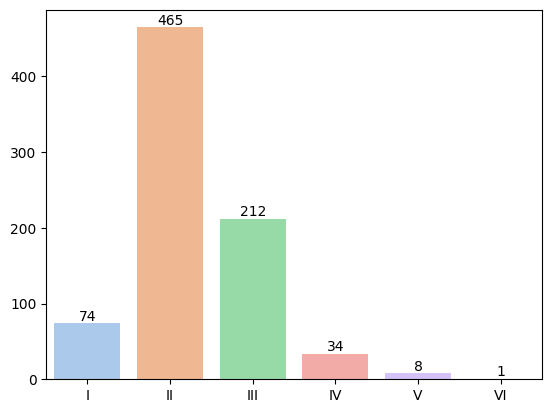

HIBA
 Patient/s with skin tone informed:  566
 Corresponding %:  90.85072231139647

 Patient/s without skin tone informed:  57
 Corresponding %:  9.149277688603531


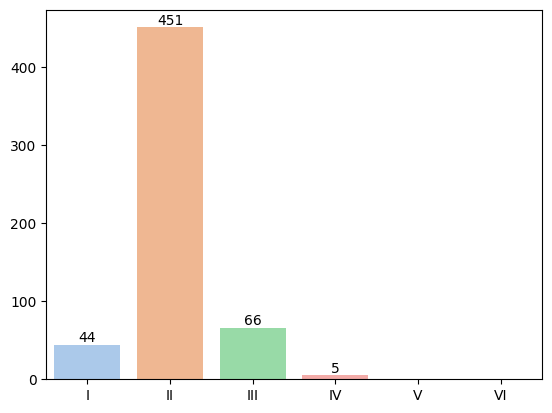

In [ ]:
print('Skin Tone distribution (PATIENT ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  try:
    if 'ISIC' not in ds:
      df= datasets[ds].copy()
      df.drop_duplicates(['patient_id'], inplace=True)
      print(ds)
      if ds =='PADUFES_20':
        df.rename(columns={'fitspatrick':'skin_type'}, inplace=True)
        df.skin_type = df.skin_type.replace(1.0,'I').replace(2.0,'II').replace(3.0,'III').replace(4.0,'IV').replace(5.0,'V').replace(6.0,'VI')

      try:
        print(' Patient/s with skin tone informed: ', df.skin_type.value_counts().sum())
        print(' Corresponding %: ', (df.skin_type.value_counts().sum()/len(df)*100))
        print('\n Patient/s without skin tone informed: ', df.skin_type.value_counts(dropna=False)[np.nan])
        print(' Corresponding %: ', (df.skin_type.value_counts(dropna=False)[np.nan]/len(df)*100))
      except:
        pass

      ax = sns.barplot(x=df.skin_type.value_counts(dropna=False).keys(), y=df.skin_type.value_counts(dropna=False).values, data=df, palette='pastel', order=['I','II','III','IV', 'V', 'VI'])
      _ = ax.bar_label(ax.containers[0])
      plt.show()
  except:
    pass

##Cancer history

In [ ]:
print('Cancer history information (IMAGE ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):

  print(ds)
  df= datasets[ds]
  if ds !='PADUFES_20':
    print(f' Personal history of melanoma > {df.personal_hx_mm.value_counts(dropna=False)[np.nan]} ({df.personal_hx_mm.value_counts(dropna=False)[np.nan]/len(df)*100}%) UNK - {df.personal_hx_mm.value_counts(dropna=False)[True]} ({df.personal_hx_mm.value_counts(dropna=False)[True]/len(df)*100}%) POSITIVE - {df.personal_hx_mm.value_counts(dropna=False)[False]} ({df.personal_hx_mm.value_counts(dropna=False)[False]/len(df)*100}%) NEGATIVE')
    print(f' Family history of melanoma > {df.family_hx_mm.value_counts(dropna=False)[np.nan]} ({df.family_hx_mm.value_counts(dropna=False)[np.nan]/len(df)*100}%) UNK - {df.family_hx_mm.value_counts(dropna=False)[True]} ({df.family_hx_mm.value_counts(dropna=False)[True]/len(df)*100}%) POSITIVE - {df.family_hx_mm.value_counts(dropna=False)[False]} ({df.family_hx_mm.value_counts(dropna=False)[False]/len(df)*100}%) NEGATIVE\n\n')
  else:
    print(f' Skin Cancer history > {df.skin_cancer_history.value_counts(dropna=False)[np.nan]} ({df.skin_cancer_history.value_counts(dropna=False)[np.nan]/len(df)*100}%) UNK - {df.skin_cancer_history.value_counts(dropna=False)[True]} ({df.skin_cancer_history.value_counts(dropna=False)[True]/len(df)*100}%) POSITIVE - {df.skin_cancer_history.value_counts(dropna=False)[False]} ({df.skin_cancer_history.value_counts(dropna=False)[False]/len(df)*100}%) NEGATIVE\n\n')


Cancer history information (IMAGE ANALYSIS)

ISIC_19
 Personal history of melanoma > 24776 (97.80900872448778%) UNK - 162 (0.6395325885278907%) POSITIVE - 393 (1.5514586869843277%) NEGATIVE
 Family history of melanoma > 24786 (97.84848604476728%) UNK - 95 (0.37503454265524455%) POSITIVE - 450 (1.776479412577474%) NEGATIVE


ISIC_20
 Personal history of melanoma > 25181 (76.01581839038822%) UNK - 5426 (16.379882871460484%) POSITIVE - 2519 (7.604298738151301%) NEGATIVE
 Family history of melanoma > 25480 (76.91843265108977%) UNK - 3758 (11.344563182998249%) POSITIVE - 3888 (11.737004165911973%) NEGATIVE


PADUFES_20
 Skin Cancer history > 804 (34.9869451697128%) UNK - 681 (29.634464751958223%) POSITIVE - 813 (35.37859007832898%) NEGATIVE


HIBA
 Personal history of melanoma > 731 (45.23514851485149%) UNK - 386 (23.886138613861384%) POSITIVE - 499 (30.878712871287128%) NEGATIVE
 Family history of melanoma > 857 (53.03217821782178%) UNK - 156 (9.653465346534654%) POSITIVE - 603 (37.3143564

In [ ]:
print('Cancer history information (PATIENT ANALYSIS)\n')
for i,ds in enumerate(datasets.keys()):
  try:
    df= datasets[ds].copy()
    df.drop_duplicates(['patient_id'], inplace=True)
    print(ds)
    if ds !='PADUFES_20':
      print(' Information available for %d patients (%.2f of the dataset)'%(len(df), len(df)/len(datasets[ds])*100))
      print(f' Personal history of melanoma > {df.personal_hx_mm.value_counts(dropna=False)[np.nan]} ({df.personal_hx_mm.value_counts(dropna=False)[np.nan]/len(df)*100}%) UNK - {df.personal_hx_mm.value_counts(dropna=False)[True]} ({df.personal_hx_mm.value_counts(dropna=False)[True]/len(df)*100}%) POSITIVE - {df.personal_hx_mm.value_counts(dropna=False)[False]} ({df.personal_hx_mm.value_counts(dropna=False)[False]/len(df)*100}%) NEGATIVE')
      print(f' Family history of melanoma > {df.family_hx_mm.value_counts(dropna=False)[np.nan]} ({df.family_hx_mm.value_counts(dropna=False)[np.nan]/len(df)*100}%) UNK - {df.family_hx_mm.value_counts(dropna=False)[True]} ({df.family_hx_mm.value_counts(dropna=False)[True]/len(df)*100}%) POSITIVE - {df.family_hx_mm.value_counts(dropna=False)[False]} ({df.family_hx_mm.value_counts(dropna=False)[False]/len(df)*100}%) NEGATIVE\n\n')
    else:
      print(f' Skin Cancer history > {df.skin_cancer_history.value_counts(dropna=False)[np.nan]} ({df.skin_cancer_history.value_counts(dropna=False)[np.nan]/len(df)*100}%) UNK - {df.skin_cancer_history.value_counts(dropna=False)[True]} ({df.skin_cancer_history.value_counts(dropna=False)[True]/len(df)*100}%) POSITIVE - {df.skin_cancer_history.value_counts(dropna=False)[False]} ({df.skin_cancer_history.value_counts(dropna=False)[False]/len(df)*100}%) NEGATIVE\n\n')
  except:
    pass

Cancer history information (PATIENT ANALYSIS)

ISIC_20
 Information available for 2056 patients (100.00 of the dataset)
 Personal history of melanoma > 1776 (86.38132295719845%) UNK - 180 (8.754863813229571%) POSITIVE - 100 (4.863813229571985%) NEGATIVE
 Family history of melanoma > 1785 (86.81906614785993%) UNK - 140 (6.809338521400778%) POSITIVE - 131 (6.371595330739299%) NEGATIVE


PADUFES_20
 Skin Cancer history > 579 (42.170429715950476%) UNK - 350 (25.491624180626367%) POSITIVE - 444 (32.33794610342316%) NEGATIVE


HIBA
 Information available for 623 patients (100.00 of the dataset)
 Personal history of melanoma > 339 (54.41412520064205%) UNK - 150 (24.077046548956663%) POSITIVE - 134 (21.508828250401287%) NEGATIVE
 Family history of melanoma > 386 (61.95826645264848%) UNK - 31 (4.975922953451043%) POSITIVE - 206 (33.06581059390048%) NEGATIVE




##Diagnosis

Diagnosis (IMAGE ANALYSIS)


 ISIC_19


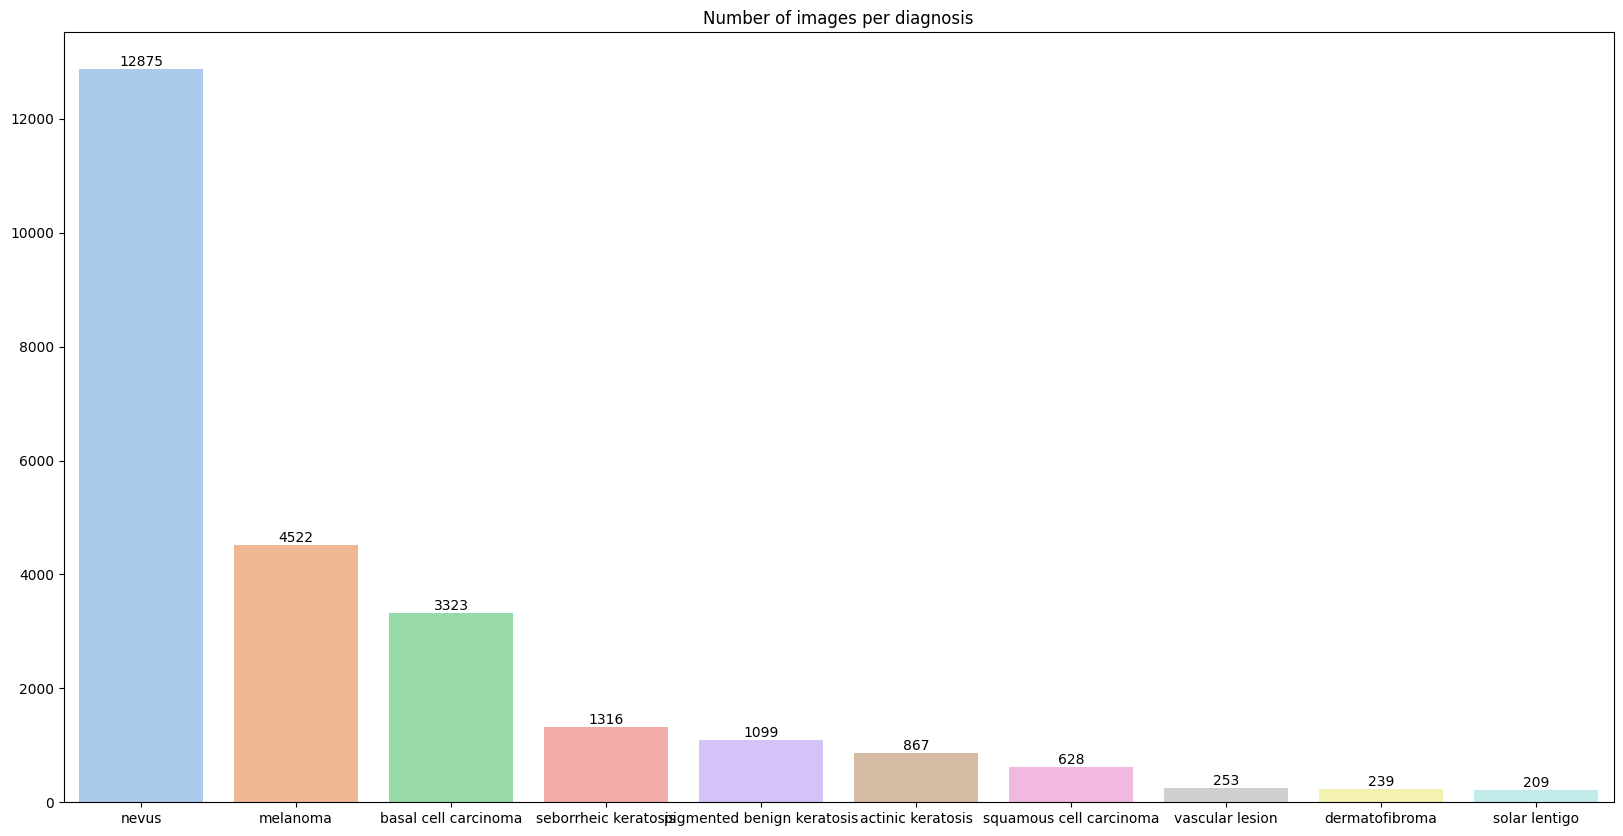


 ISIC_20


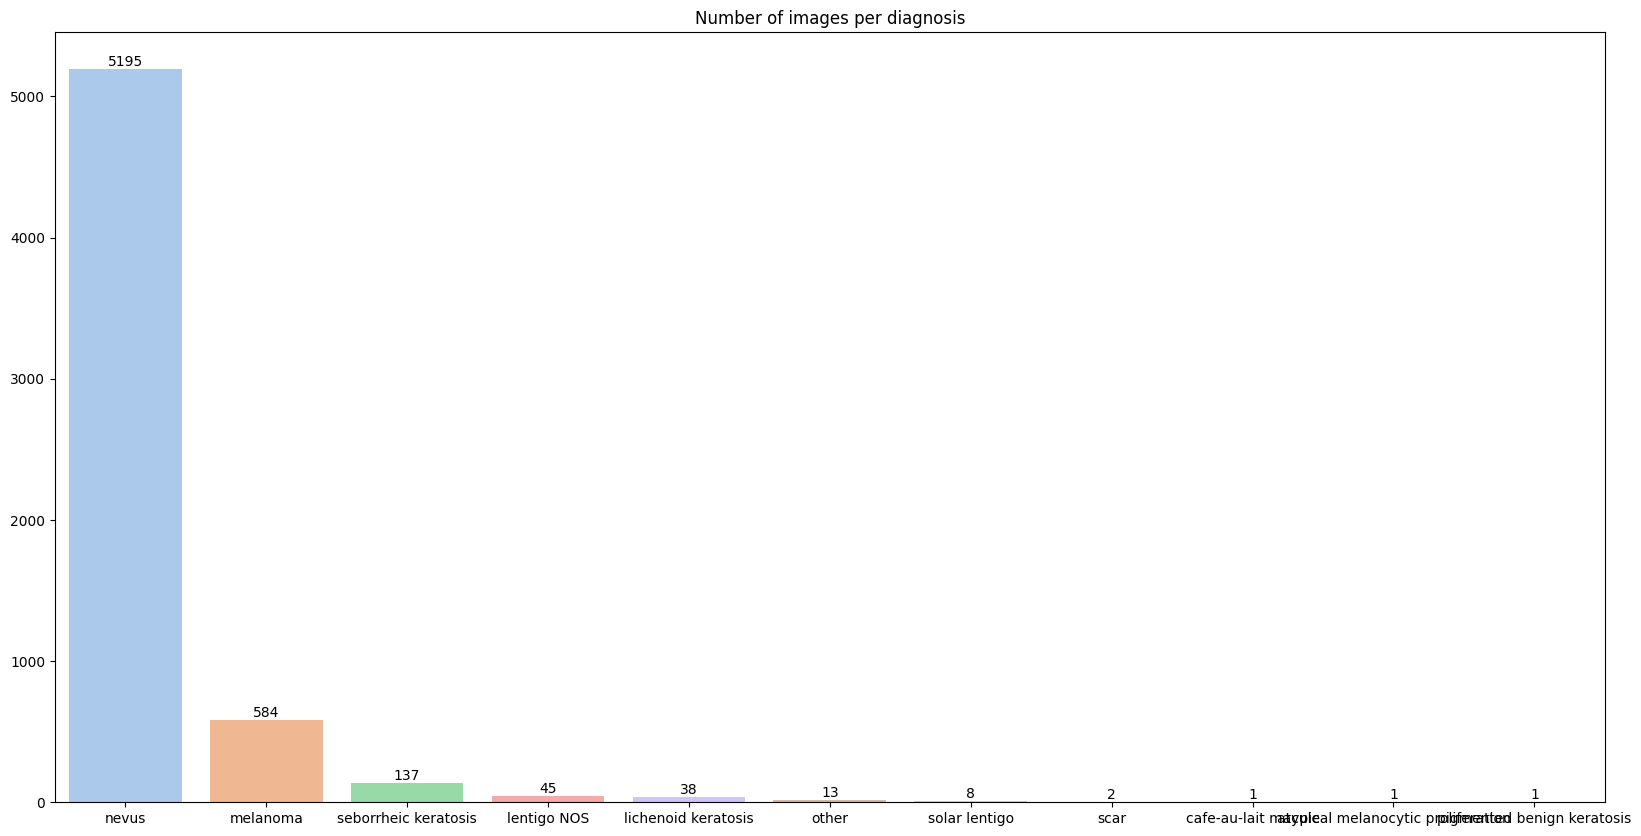


 PADUFES_20


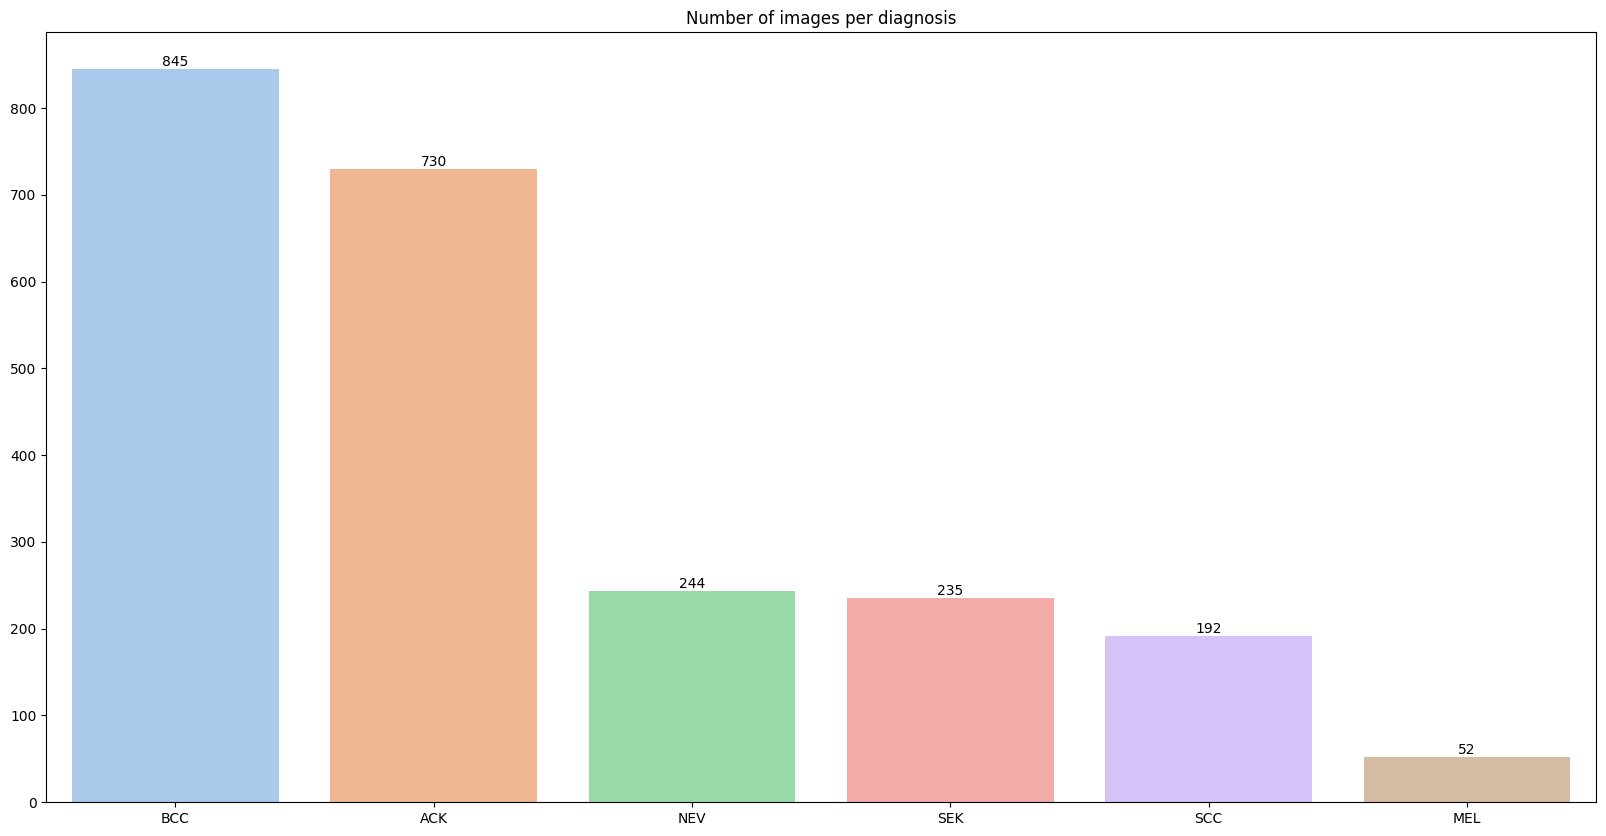


 HIBA


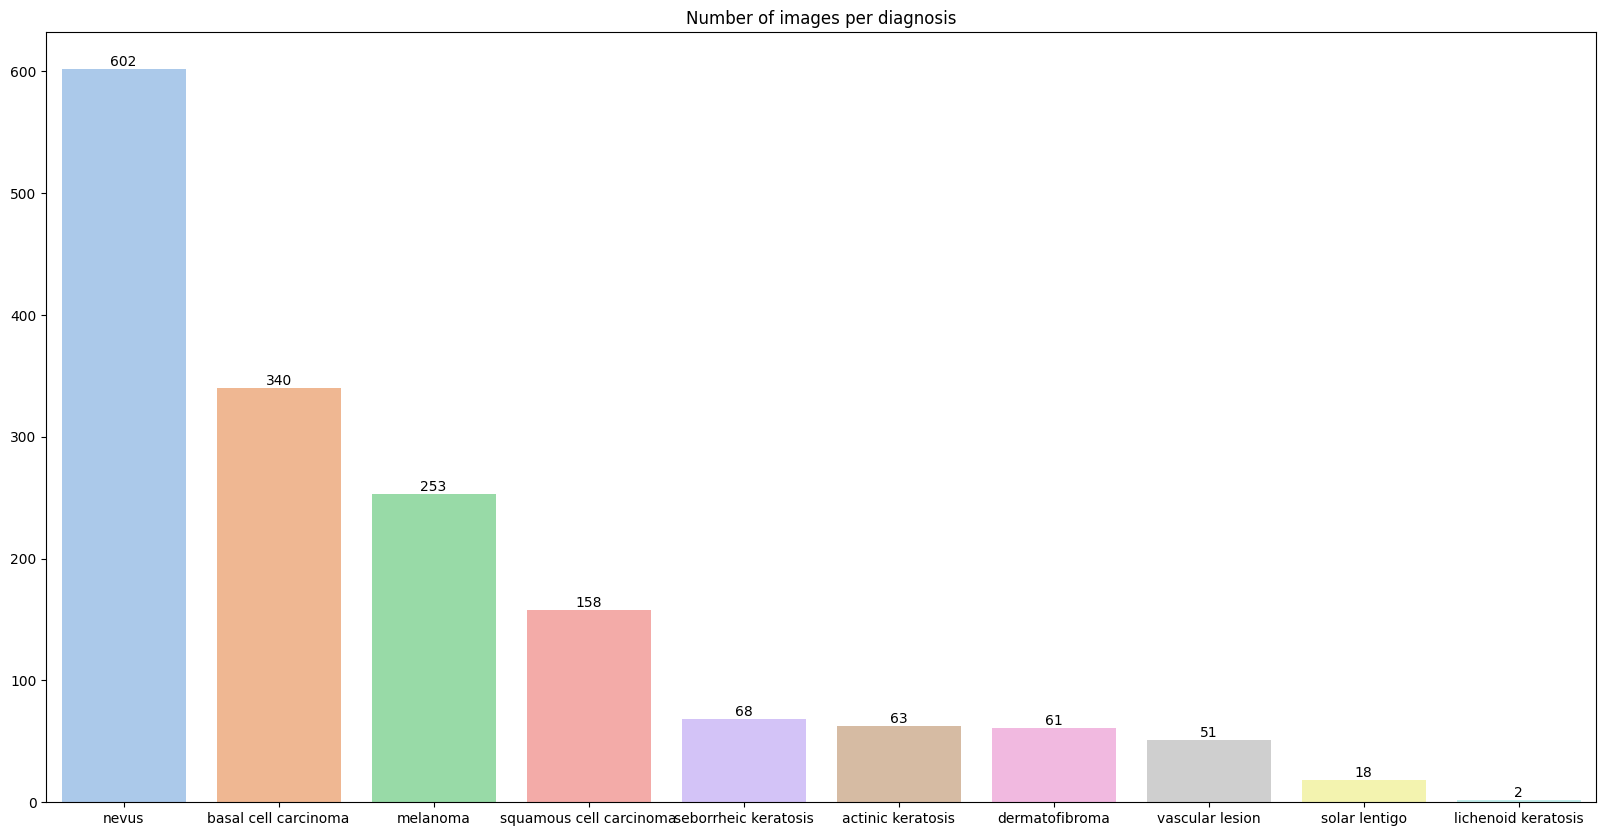

In [ ]:
print('Diagnosis (IMAGE ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  print('\n', ds)
  df= datasets[ds].copy()
  if ds =='PADUFES_20':
    df.rename(columns={'diagnostic':'diagnosis'}, inplace=True)

  fig, ax = plt.subplots(figsize=(20,10))
  ax = sns.barplot(x=df.diagnosis.value_counts().keys(), y=df.diagnosis.value_counts().values, data=df, palette='pastel')
  ax.set_title('Number of images per diagnosis')
  _ = ax.bar_label(ax.containers[0])
  plt.show()

Diagnosis (LESION ANALYSIS)


 ISIC_20


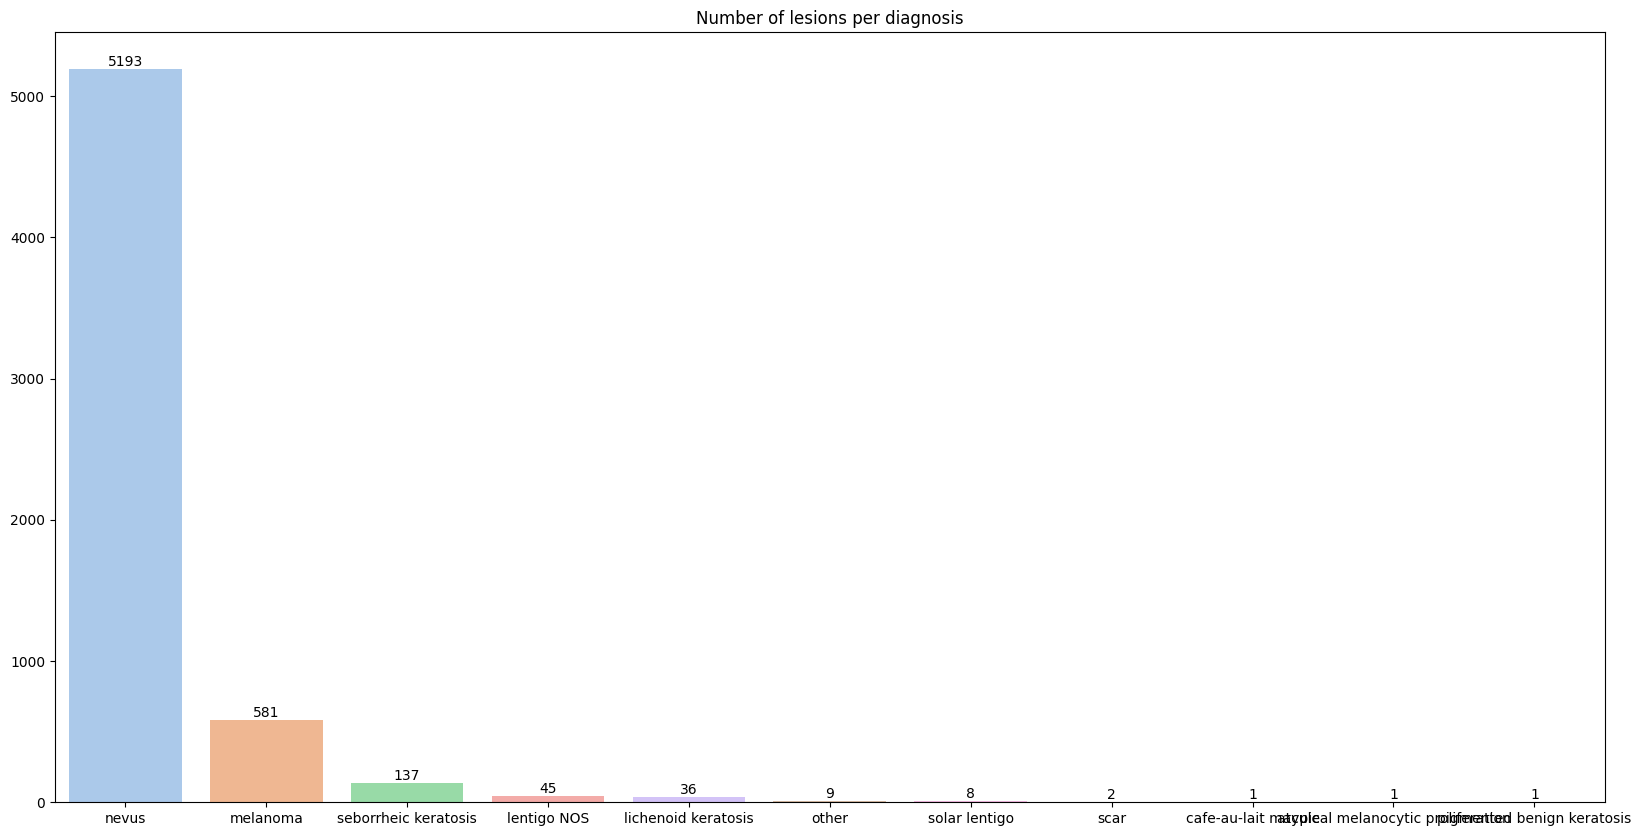


 PADUFES_20


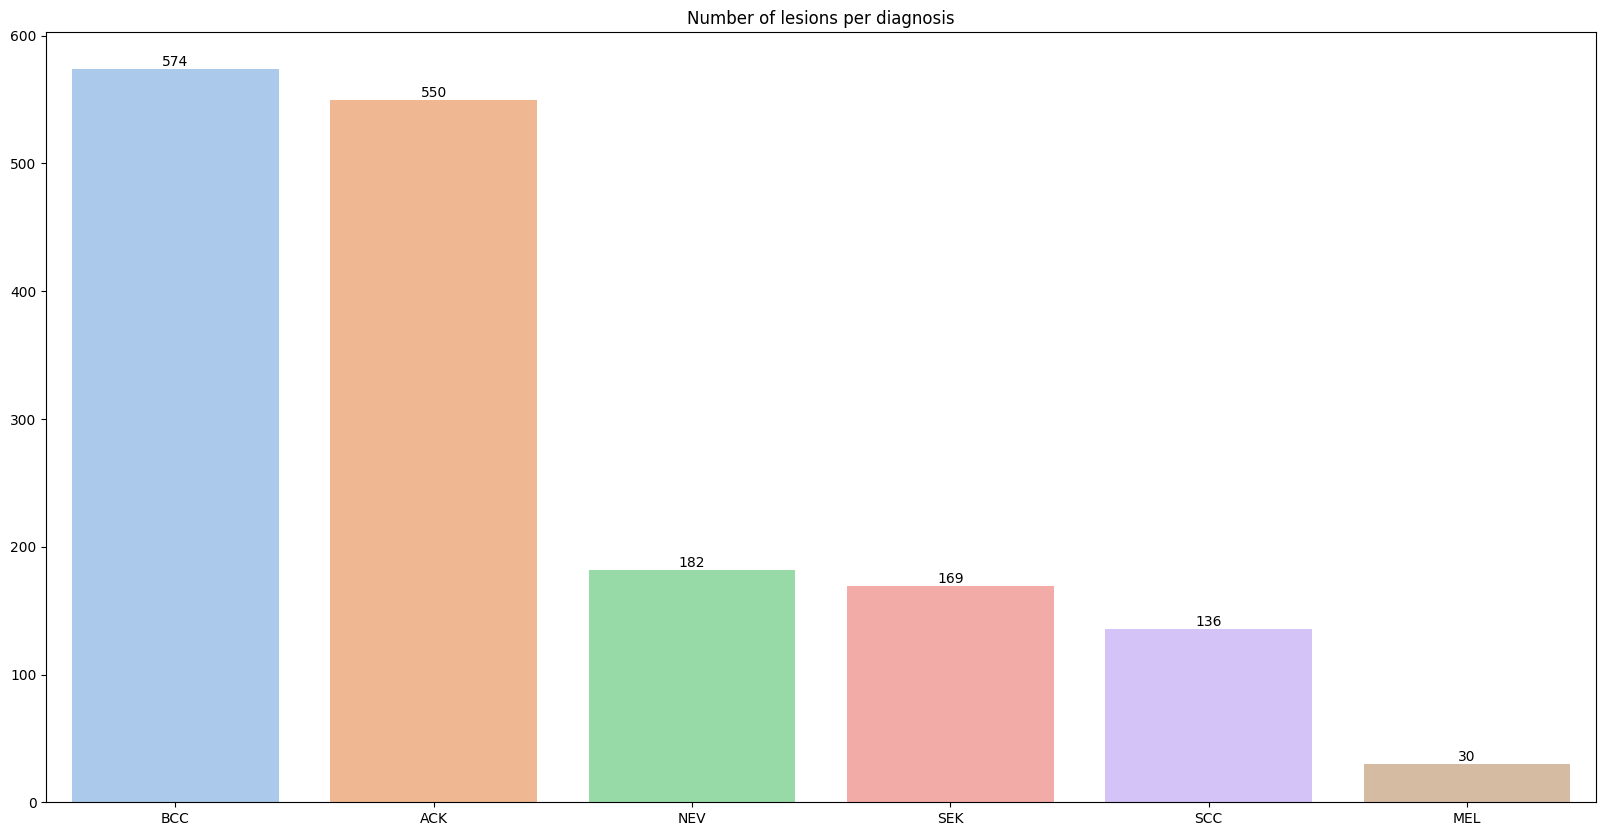


 HIBA


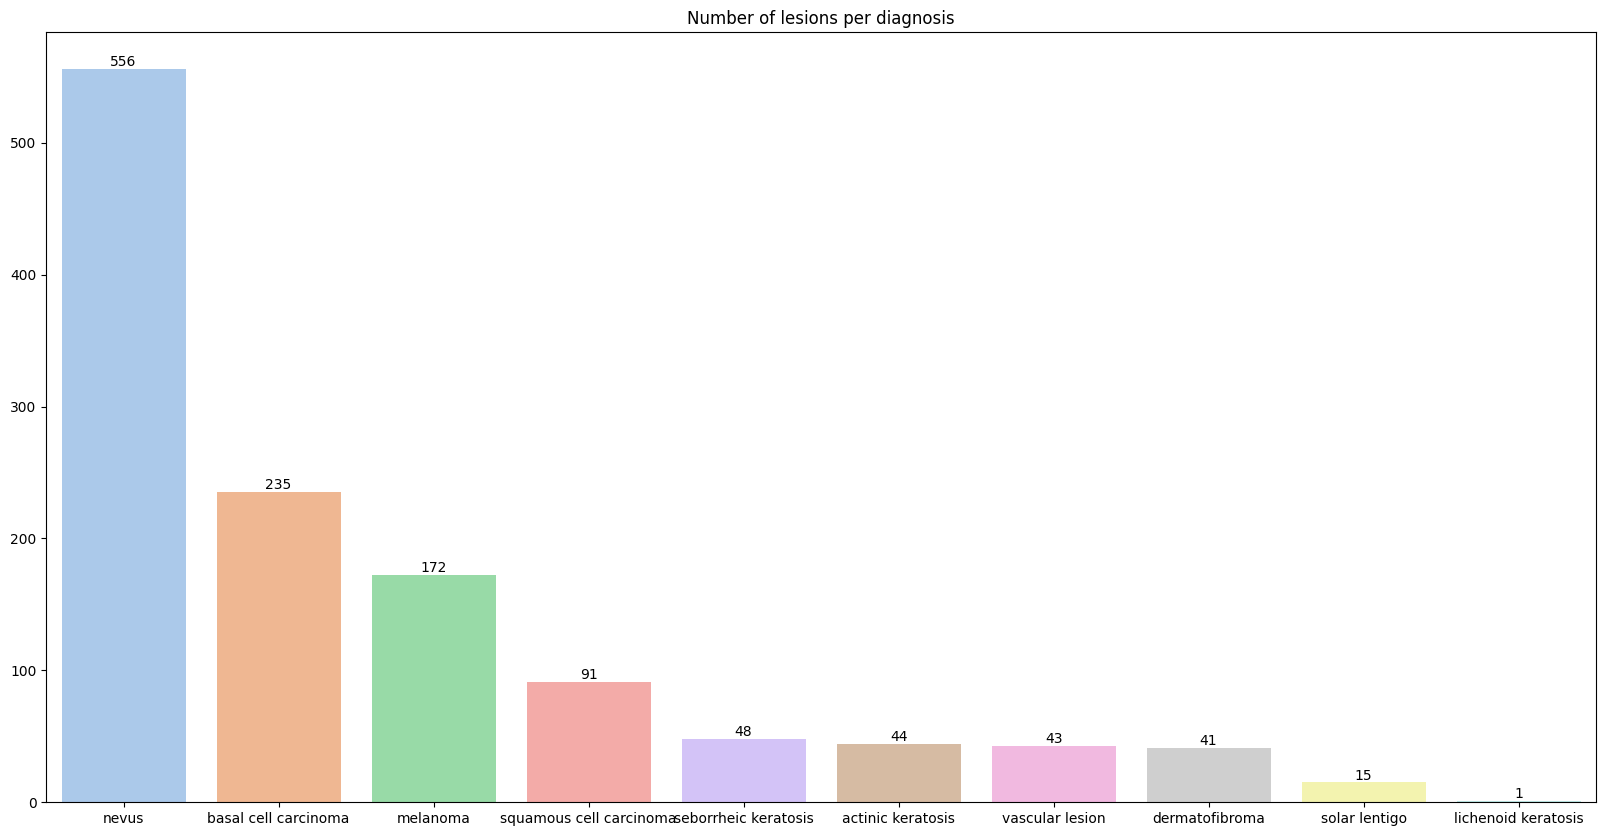

In [ ]:
print('Diagnosis (LESION ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  if ds!='ISIC_19':
    print('\n', ds)
    df= datasets[ds].copy()
    df.drop_duplicates(['lesion_id'], inplace=True)
    if ds =='PADUFES_20':
      df.rename(columns={'diagnostic':'diagnosis'}, inplace=True)

    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x=df.diagnosis.value_counts().keys(), y=df.diagnosis.value_counts().values, data=df, palette='pastel')
    ax.set_title('Number of lesions per diagnosis')
    _ = ax.bar_label(ax.containers[0])
    plt.show()

##Benign/Malignant

Diagnosis (IMAGE ANALYSIS)


 ISIC_19
 Malignant percentage:  17.85559196241759


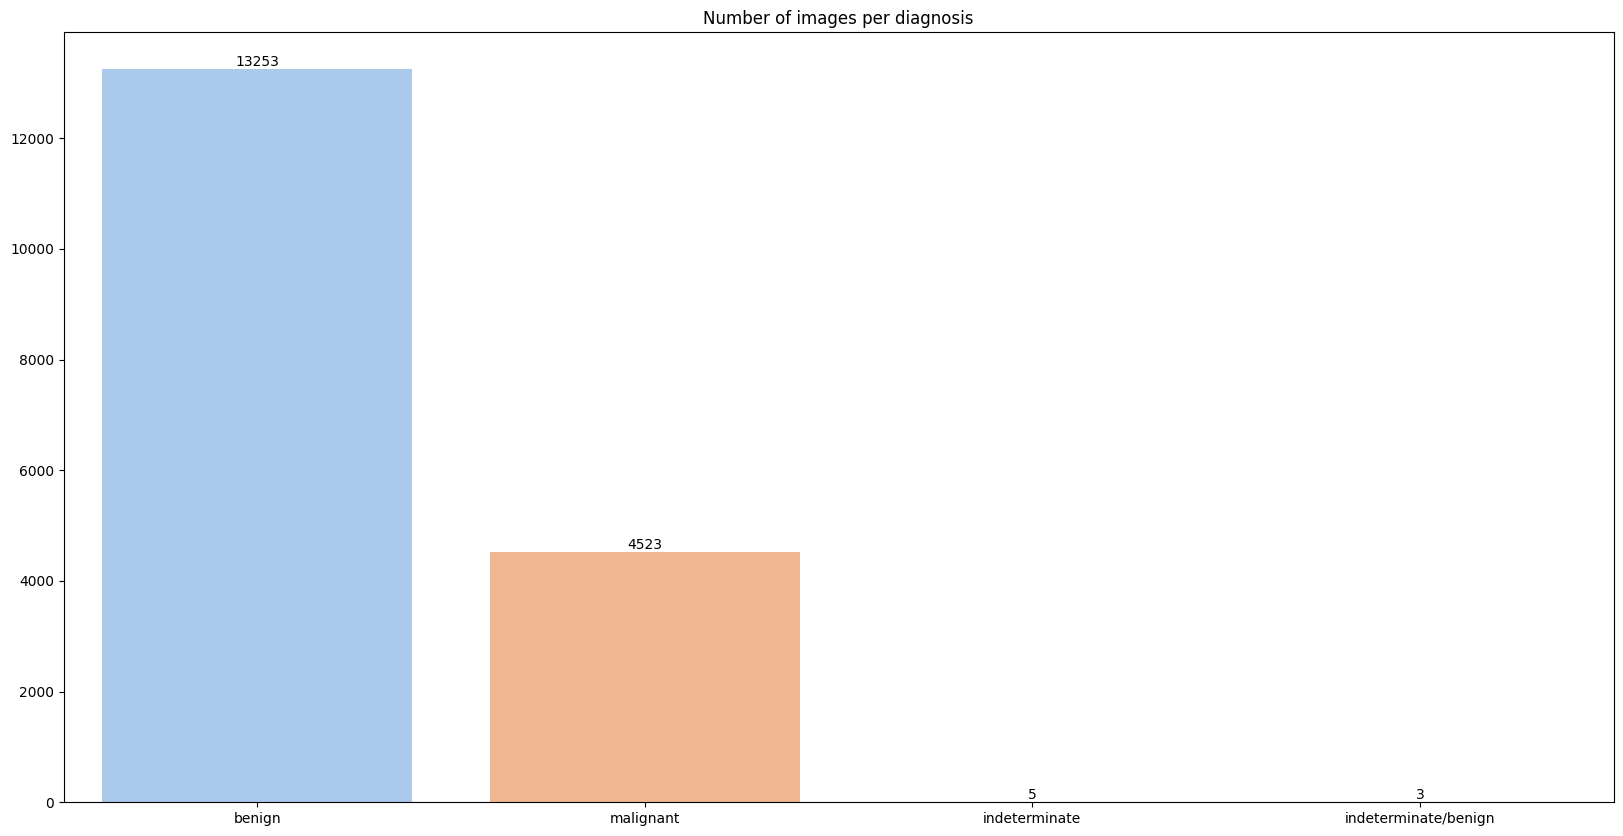


 ISIC_20
 Malignant percentage:  1.762965646320111


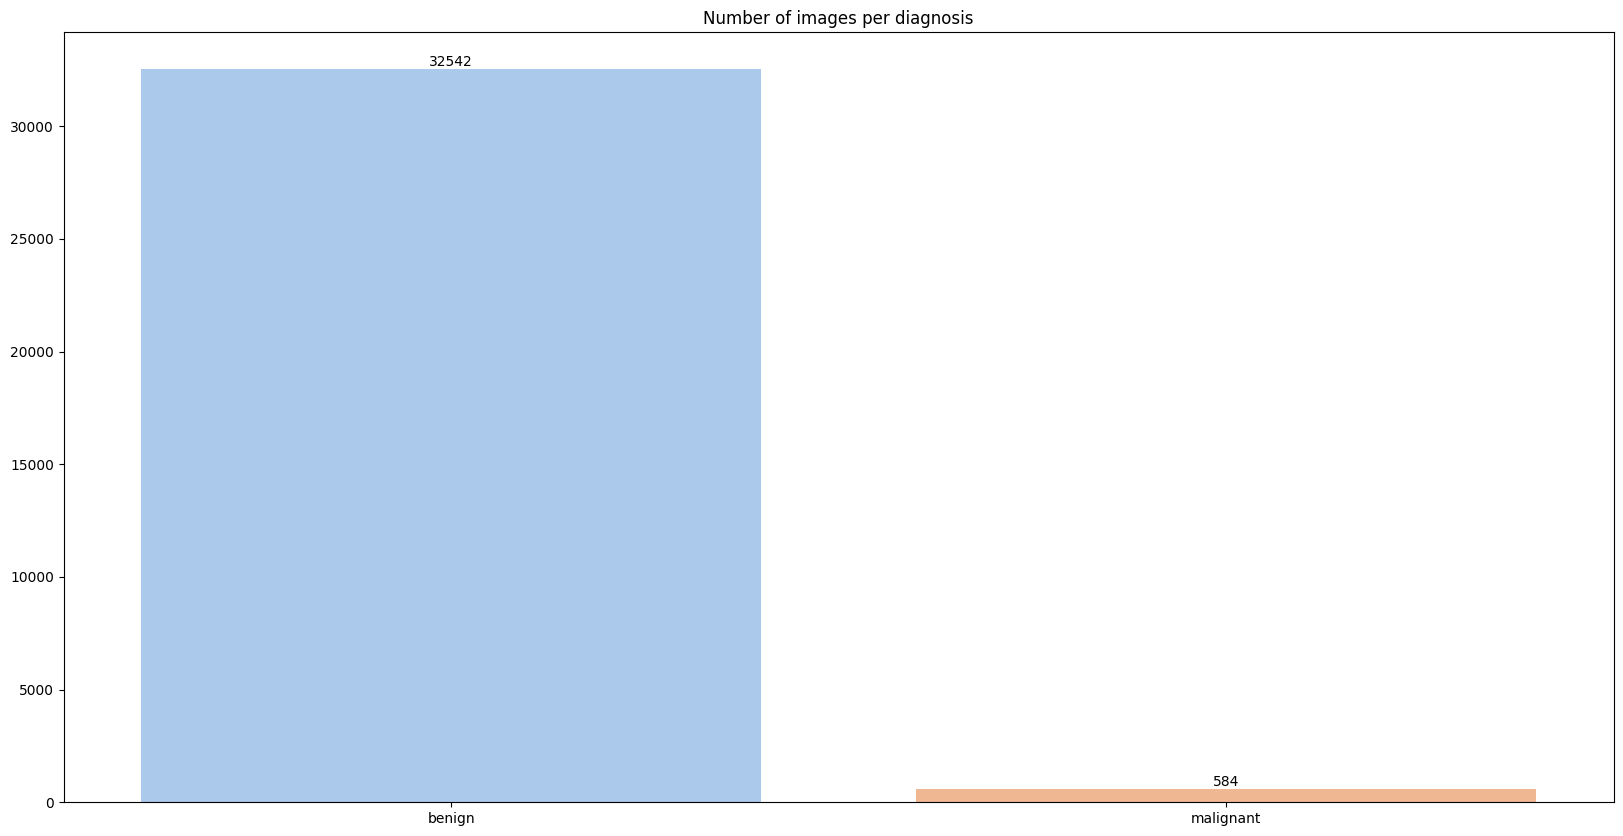


 PADUFES_20
 Malignant percentage:  47.38903394255875


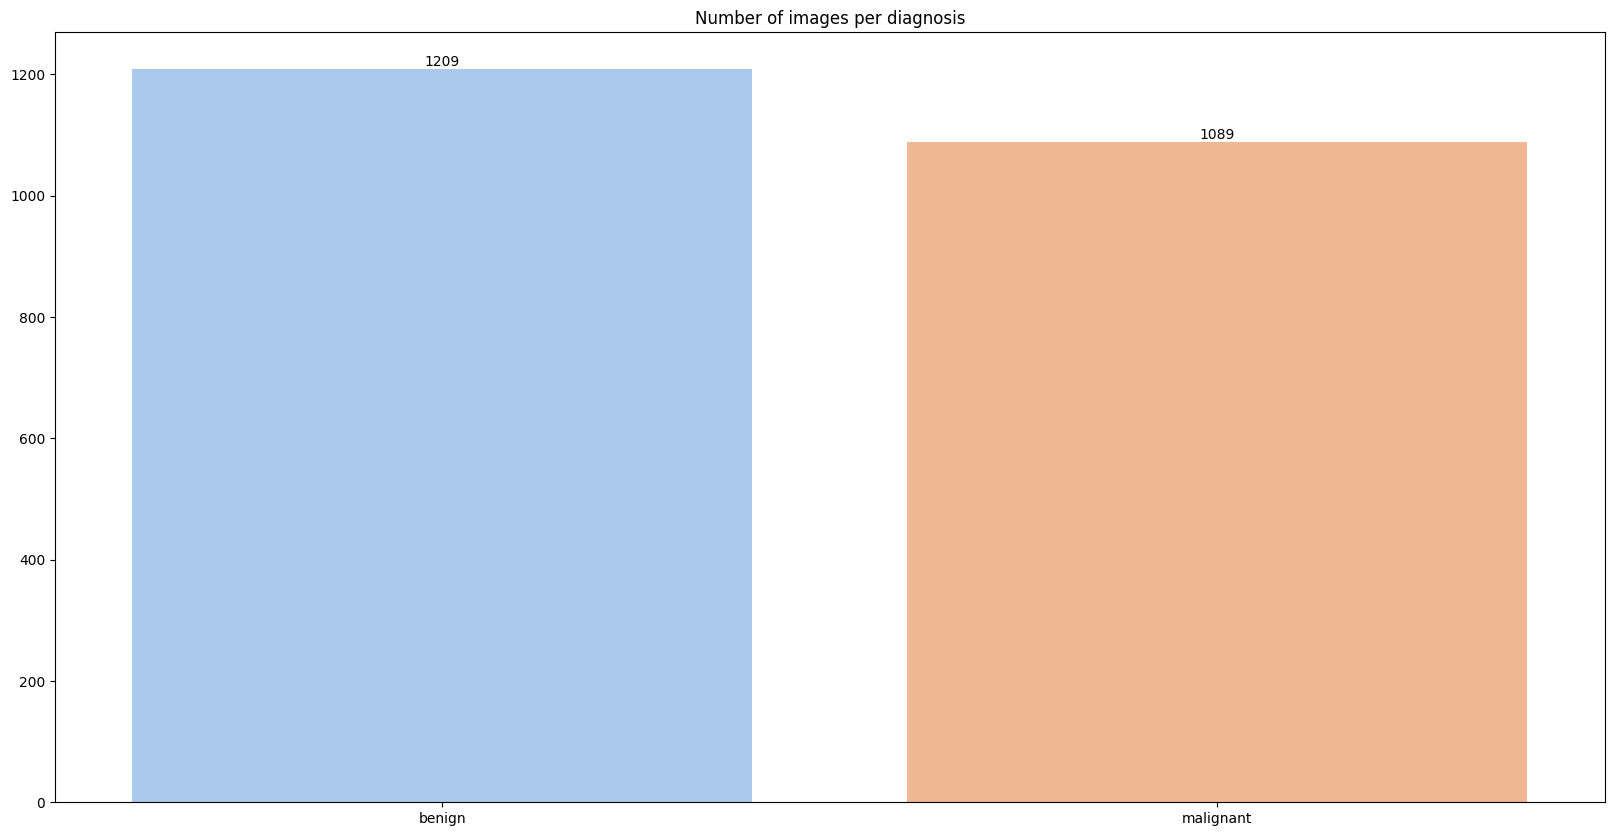


 HIBA
 Malignant percentage:  46.472772277227726


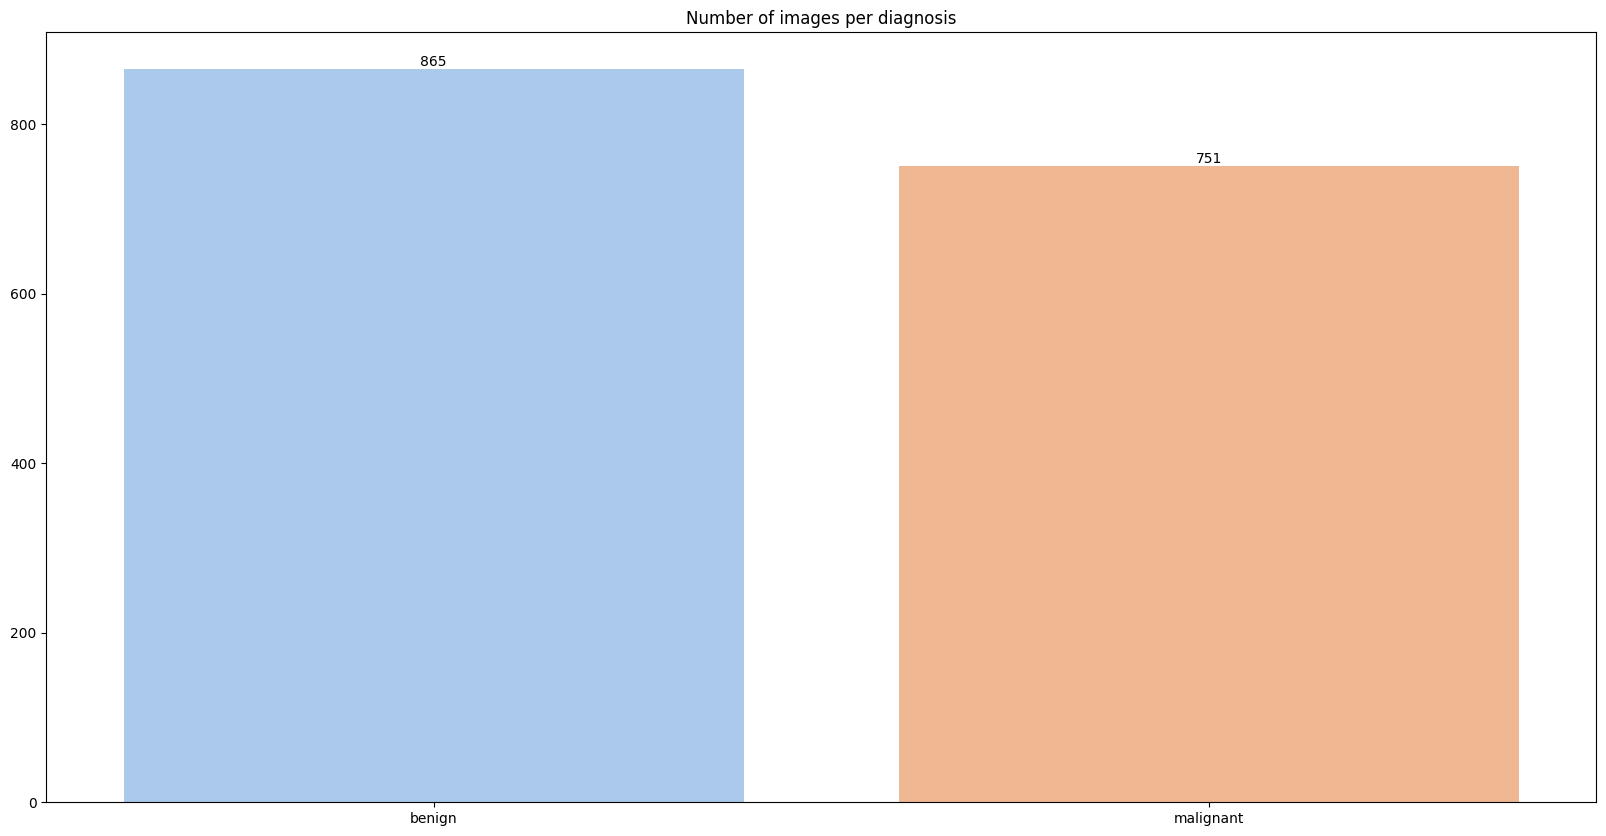

In [ ]:
print('Diagnosis (IMAGE ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  print('\n', ds)
  df= datasets[ds].copy()
  if ds =='PADUFES_20':
    df['benign_malignant']=df['diagnostic']
    df['benign_malignant'] = df['benign_malignant'].str.replace('BCC', 'malignant').replace('SCC', 'malignant').replace('MEL', 'malignant').replace('ACK', 'benign').replace('NEV', 'benign').replace('SEK', 'benign')


  print(' Malignant percentage: ', df.benign_malignant.value_counts(dropna=False)['malignant']/len(df)*100)
  fig, ax = plt.subplots(figsize=(20,10))
  ax = sns.barplot(x=df.benign_malignant.value_counts(dropna=False).keys(), y=df.benign_malignant.value_counts(dropna=False).values, data=df, palette='pastel')
  ax.set_title('Number of images per diagnosis')
  _ = ax.bar_label(ax.containers[0])

  plt.show()

Diagnosis (LESION ANALYSIS)


 ISIC_20
 Malignant percentage:  0.01776704076327941


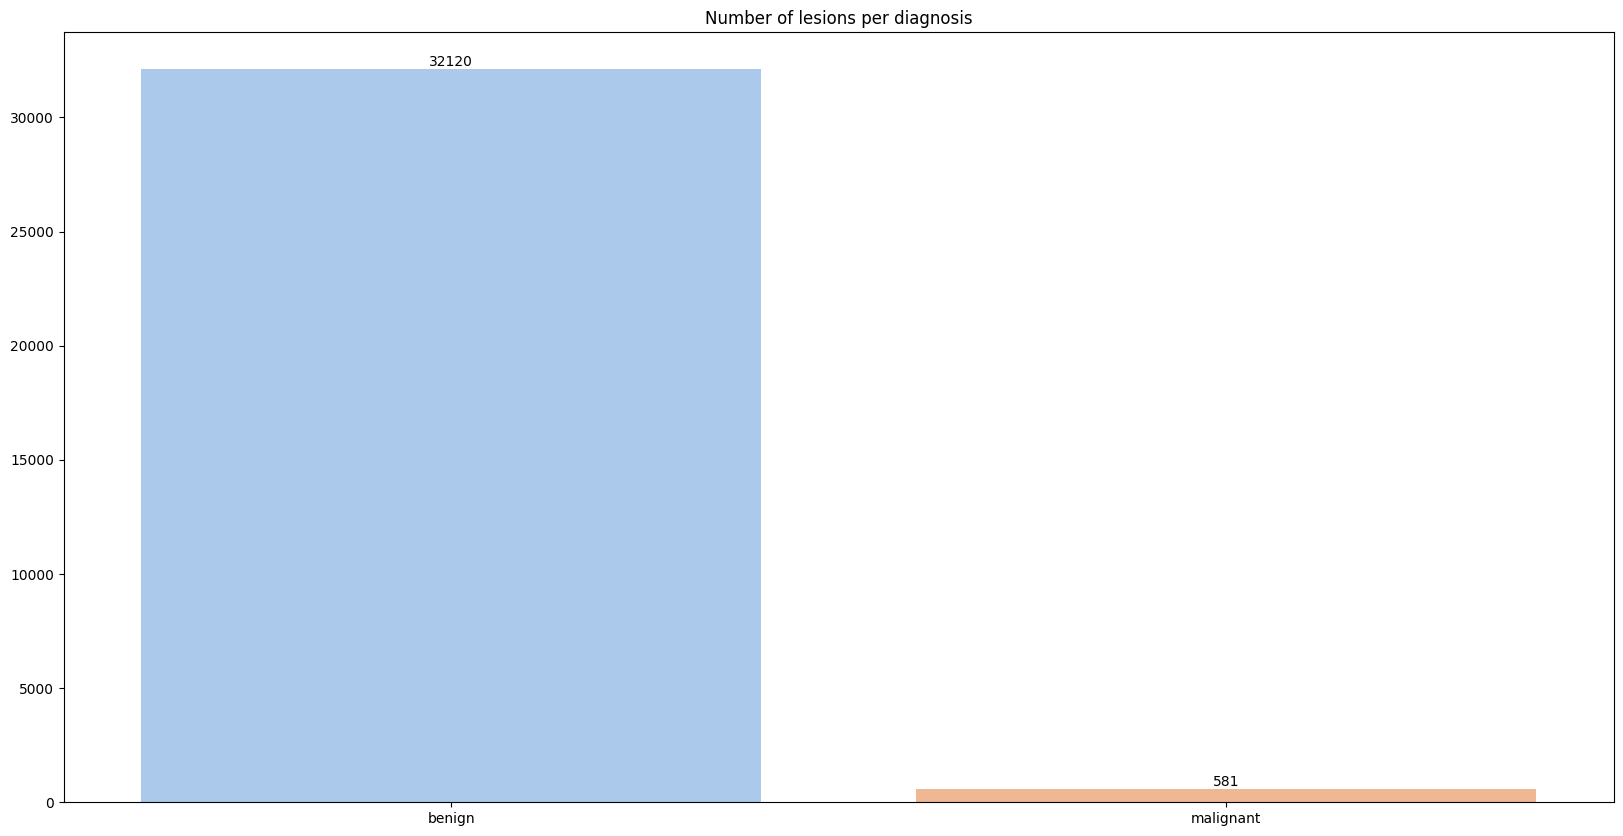


 PADUFES_20
 Malignant percentage:  0.4509445460085314


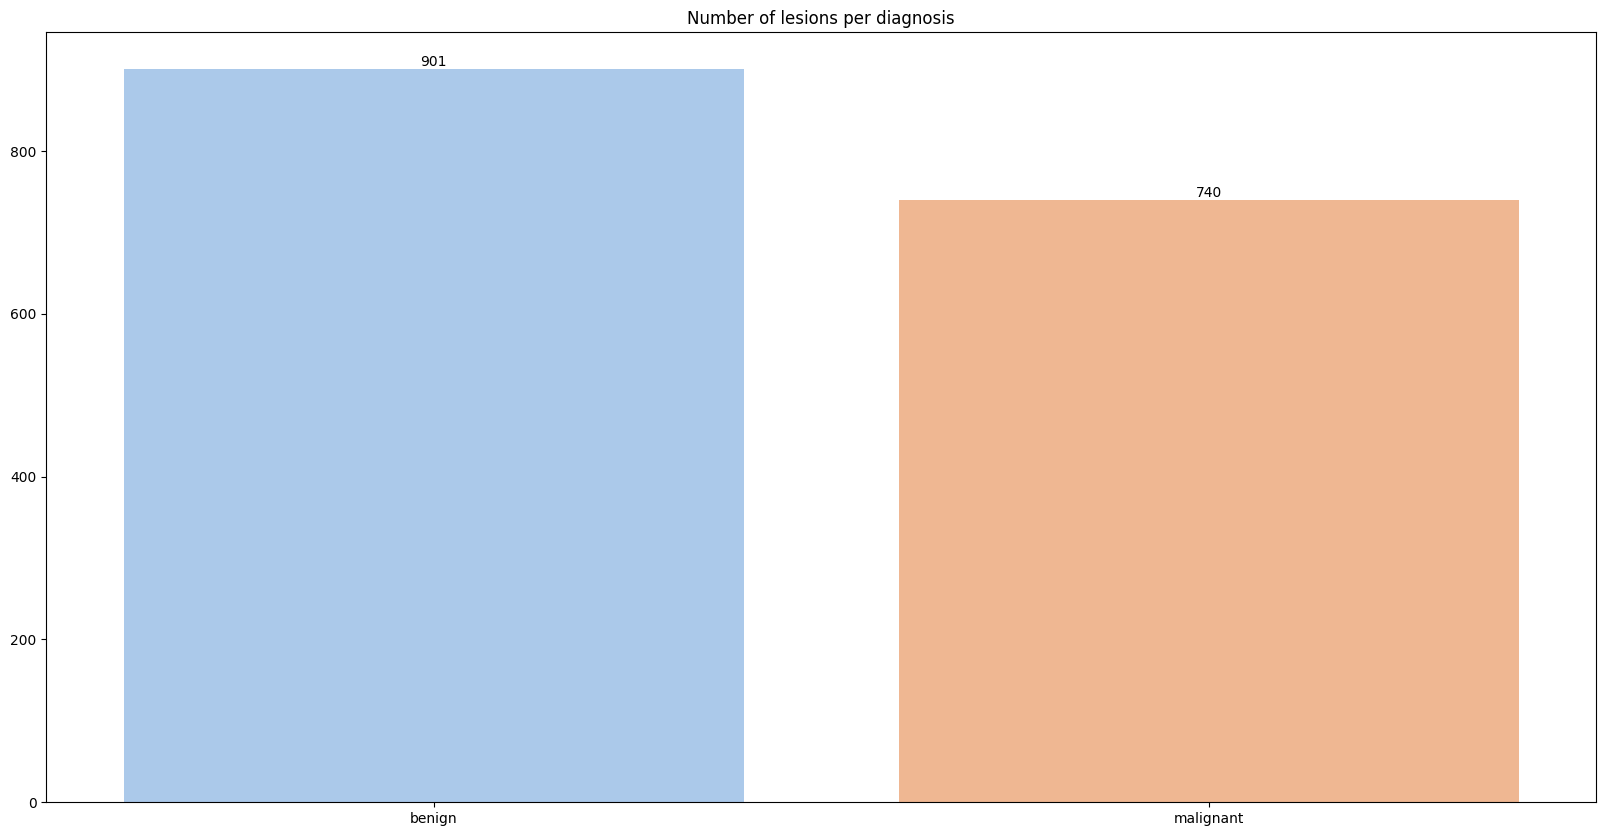


 HIBA
 Malignant percentage:  0.3996789727126806


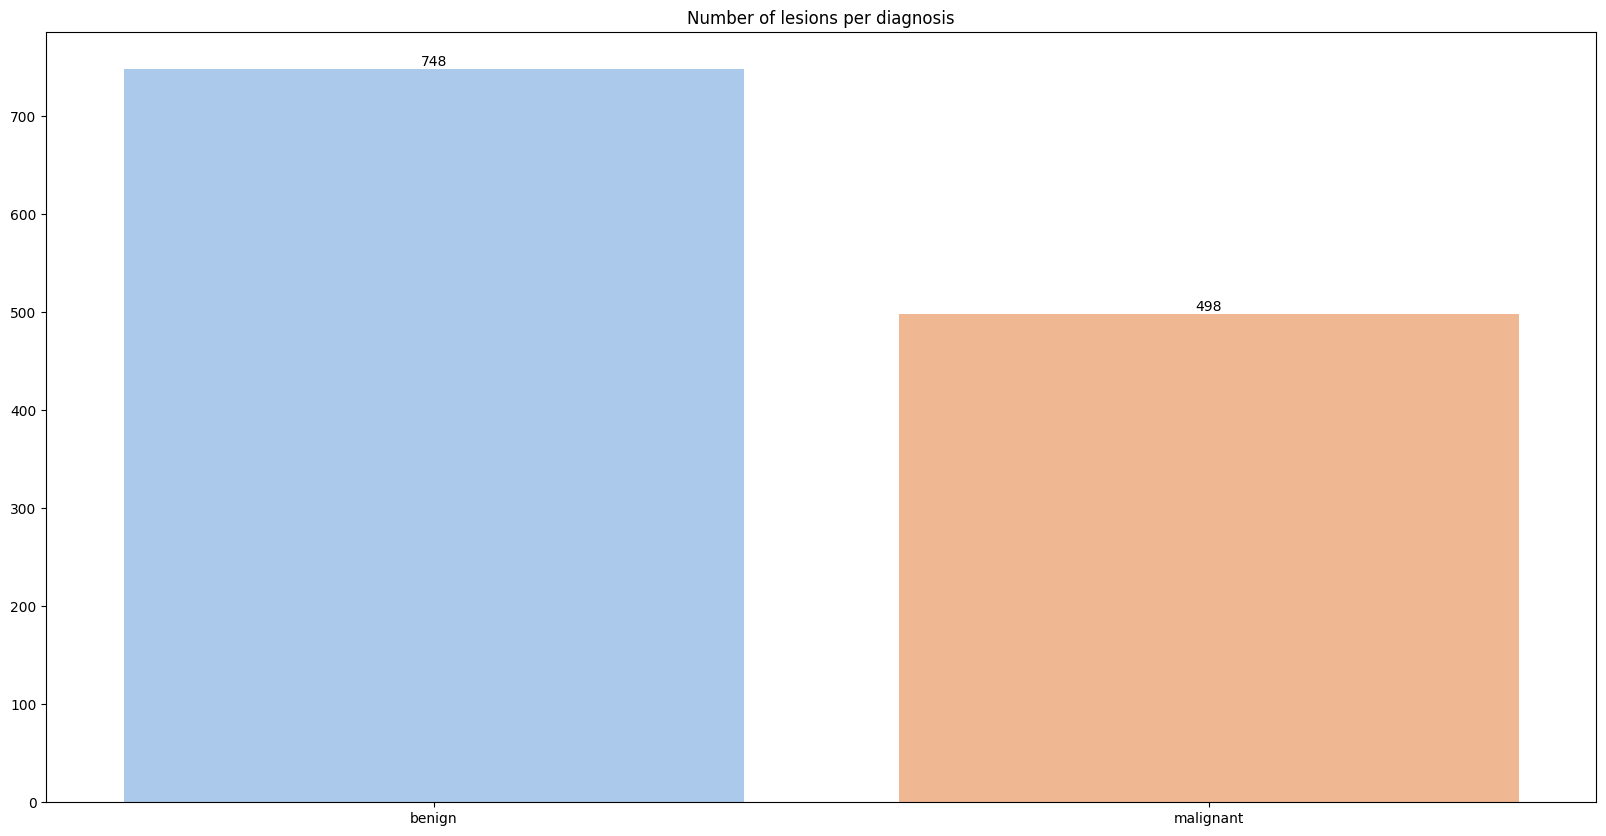

In [ ]:
print('Diagnosis (LESION ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  if ds!='ISIC_19':
    print('\n', ds)
    df= datasets[ds].copy()
    df.drop_duplicates(['lesion_id'], inplace=True)
    if ds =='PADUFES_20':
      df['benign_malignant']=df['diagnostic']
      df['benign_malignant'] = df['benign_malignant'].str.replace('BCC', 'malignant').replace('SCC', 'malignant').replace('MEL', 'malignant').replace('ACK', 'benign').replace('NEV', 'benign').replace('SEK', 'benign')

    print(' Malignant percentage: ', df.benign_malignant.value_counts(dropna=False)['malignant']/len(df) )
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x=df.benign_malignant.value_counts(dropna=False).keys(), y=df.benign_malignant.value_counts(dropna=False).values, data=df, palette='pastel')
    ax.set_title('Number of lesions per diagnosis')
    _ = ax.bar_label(ax.containers[0])
    plt.show()

##Diagnosis confirmation

Diagnosis confirmation (IMAGE ANALYSIS)

ISIC_19
 Image/s with histopathology confirmation:  17049
 Corresponding %:  0.6730488334451857


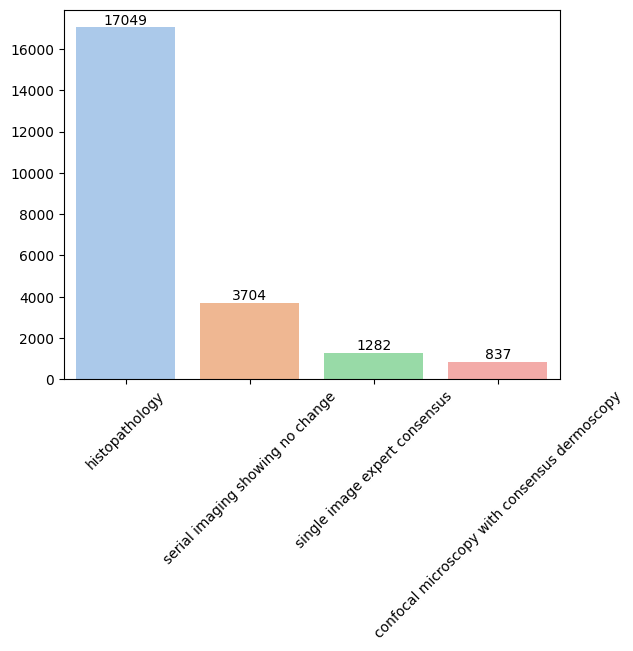

ISIC_20
 Image/s with histopathology confirmation:  2008
 Corresponding %:  0.06061703797621204


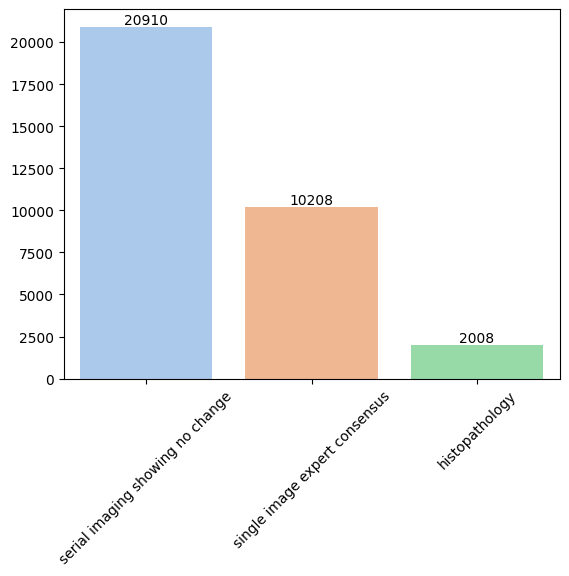

PADUFES_20
 Image/s with histopathology confirmation:  1342
 Corresponding %:  0.5839860748476936


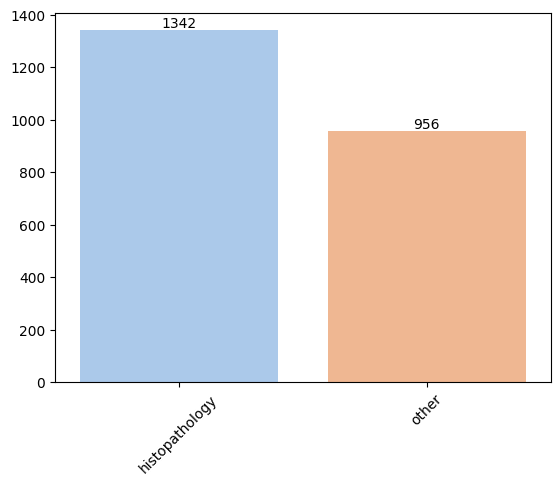

HIBA
 Image/s with histopathology confirmation:  1036
 Corresponding %:  0.6410891089108911


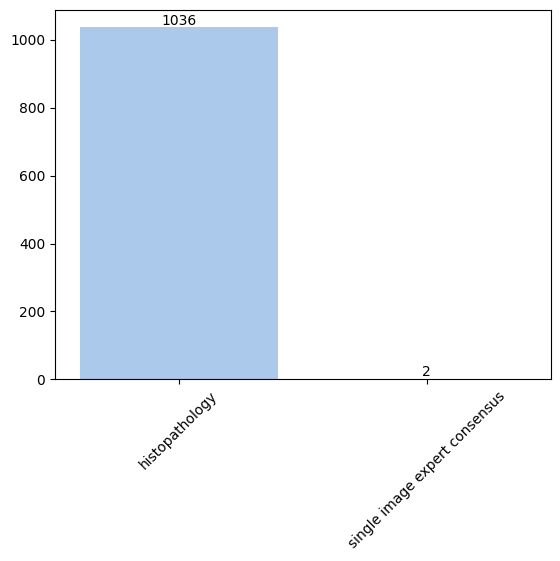

In [ ]:
print('Diagnosis confirmation (IMAGE ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):

  df= datasets[ds].copy()
  if ds =='PADUFES_20':
    df.rename(columns={'biopsed':'diagnosis_confirm_type'}, inplace=True)
    df['diagnosis_confirm_type'] = df['diagnosis_confirm_type'].replace(True,'histopathology').replace(False, 'other')

  print(ds)

  try:
    print(' Image/s with histopathology confirmation: ', len(df)-len(df[df.diagnosis_confirm_type!='histopathology']))
    print(' Corresponding %: ', (len(df)-len(df[df.diagnosis_confirm_type!='histopathology']))/len(df))
  except:
    pass

  ax = sns.barplot(x=df.diagnosis_confirm_type.value_counts(dropna=False).keys(), y=df.diagnosis_confirm_type.value_counts(dropna=False).values, data=df, palette='pastel')
  _ = ax.bar_label(ax.containers[0])
  for item in ax.get_xticklabels():
    item.set_rotation(45)
  plt.show()

Diagnosis confirmation (LESION ANALYSIS)


 ISIC_20
ISIC_20
 Lesion/s with histopathology confirmation:  1997
 Corresponding %:  6.106846885416348


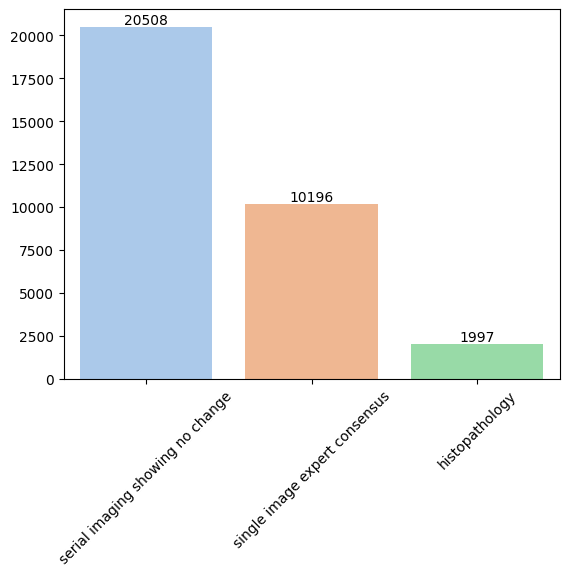


 PADUFES_20
PADUFES_20
 Lesion/s with histopathology confirmation:  930
 Corresponding %:  56.672760511883006


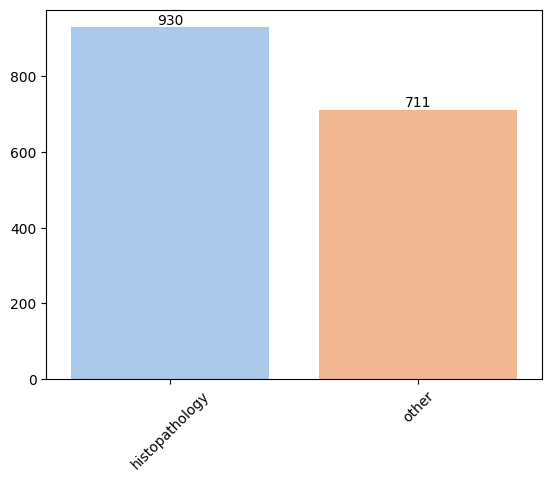


 HIBA
HIBA
 Lesion/s with histopathology confirmation:  725
 Corresponding %:  58.18619582664526


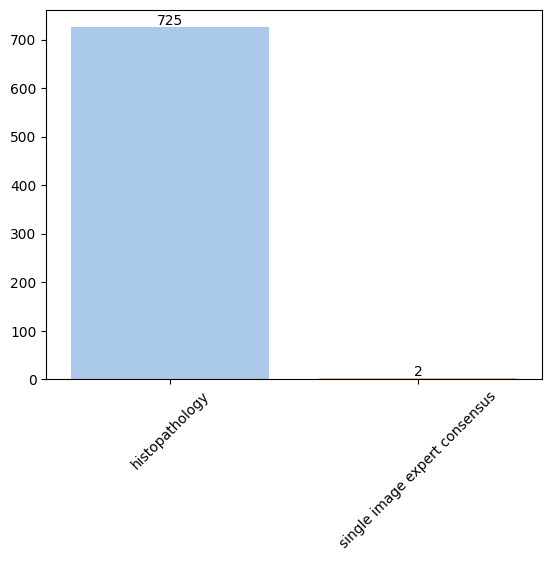

In [ ]:
print('Diagnosis confirmation (LESION ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  if ds!='ISIC_19':
    print('\n', ds)
    df= datasets[ds].copy()
    df.drop_duplicates(['lesion_id'], inplace=True)

    if ds =='PADUFES_20':
      df.rename(columns={'biopsed':'diagnosis_confirm_type'}, inplace=True)
      df['diagnosis_confirm_type'] = df['diagnosis_confirm_type'].replace(True,'histopathology').replace(False, 'other')

    print(ds)

    try:
      print(' Lesion/s with histopathology confirmation: ', len(df)-len(df[df.diagnosis_confirm_type!='histopathology']))
      print(' Corresponding %: ', (len(df)-len(df[df.diagnosis_confirm_type!='histopathology']))/len(df)*100)
    except:
      pass

    ax = sns.barplot(x=df.diagnosis_confirm_type.value_counts(dropna=False).keys(), y=df.diagnosis_confirm_type.value_counts(dropna=False).values, data=df, palette='pastel')
    _ = ax.bar_label(ax.containers[0])
    for item in ax.get_xticklabels():
      item.set_rotation(45)
    plt.show()

##General anatomical site

General Anatomical Site (IMAGE ANALYSIS)

ISIC_19
 Image/s with anatomical site detailed:  22700
 Corresponding %:  89.6135170344637


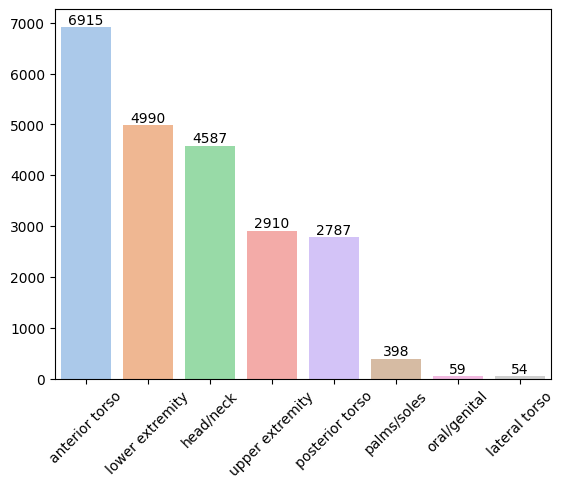

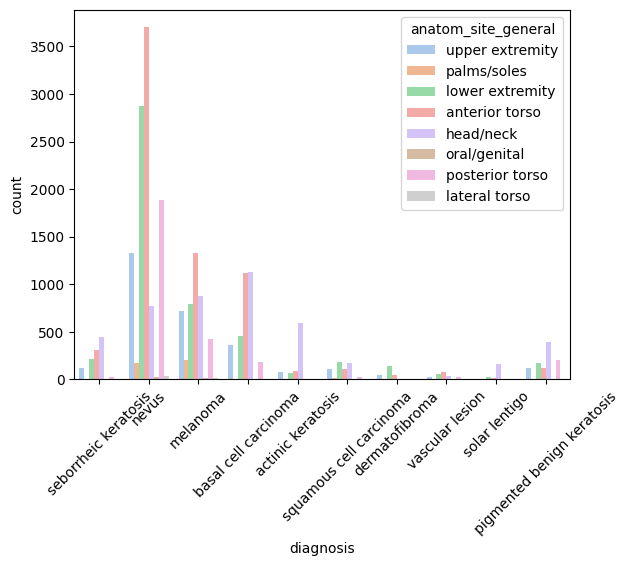

ISIC_20
 Image/s with anatomical site detailed:  30055
 Corresponding %:  90.7293364728612


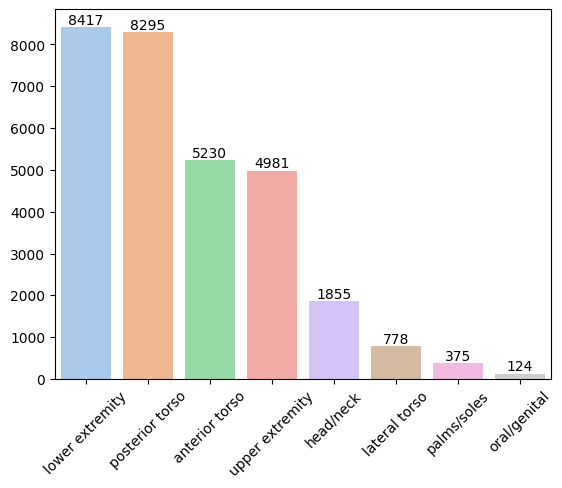

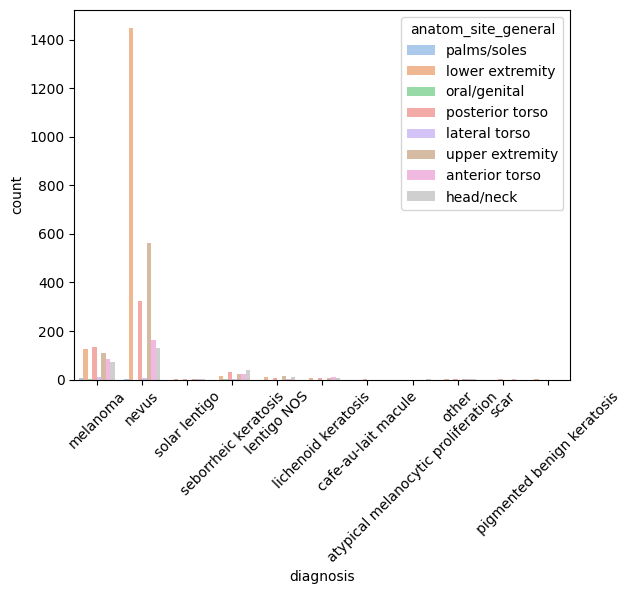

PADUFES_20
 Image/s with anatomical site detailed:  2298
 Corresponding %:  100.0


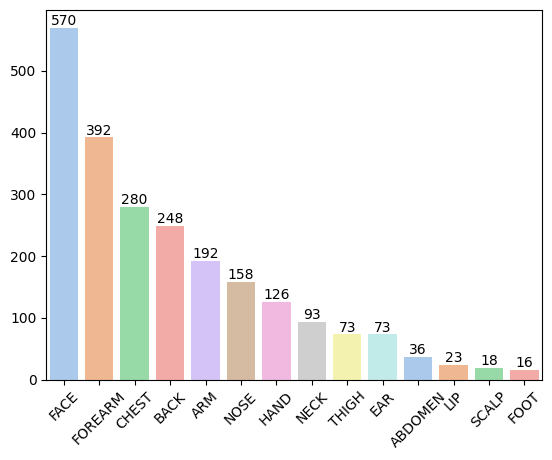

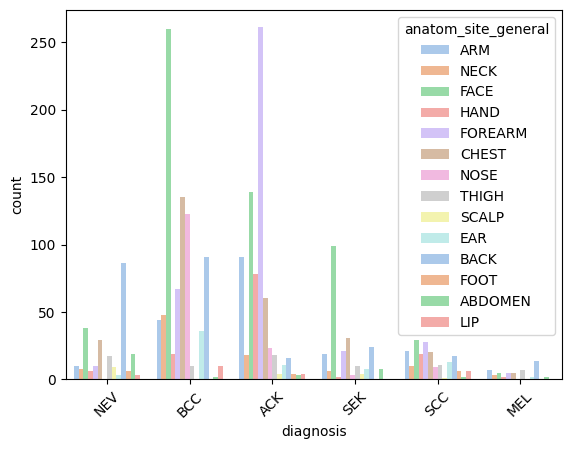

HIBA
 Image/s with anatomical site detailed:  1506
 Corresponding %:  93.1930693069307


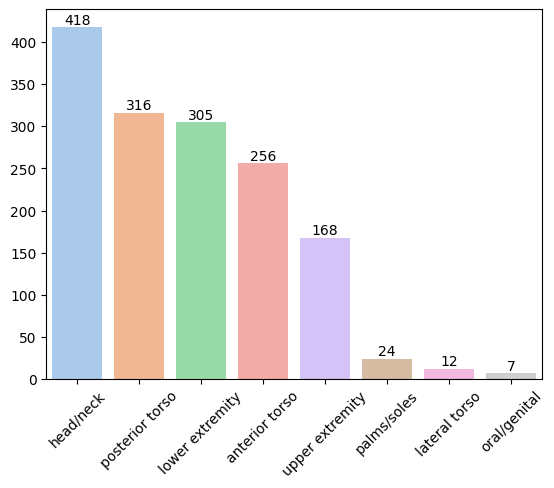

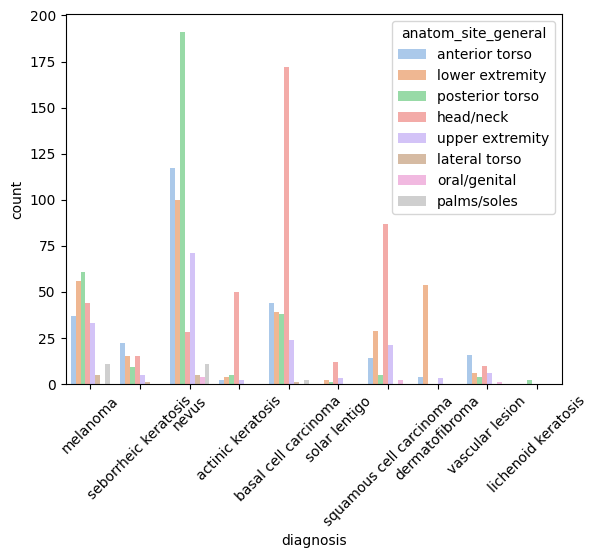

In [ ]:
print('General Anatomical Site (IMAGE ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):

  df= datasets[ds]
  if ds =='PADUFES_20':
    df.rename(columns={'region':'anatom_site_general', 'diagnostic':'diagnosis'}, inplace=True)


  print(ds)

  try:
    print(' Image/s with anatomical site detailed: ', df.anatom_site_general.value_counts().sum())
    print(' Corresponding %: ', df.anatom_site_general.value_counts().sum()/len(df)*100)
  except:
    pass

  ax = sns.barplot(x=df.anatom_site_general.value_counts(dropna=False).keys(), y=df.anatom_site_general.value_counts(dropna=False).values, data=df, palette='pastel')
  _ = ax.bar_label(ax.containers[0])
  for item in ax.get_xticklabels():
    item.set_rotation(45)
  plt.show()
  ax = sns.countplot(x='diagnosis', hue='anatom_site_general', data=df, palette='pastel')
  for item in ax.get_xticklabels():
    item.set_rotation(45)
  plt.show()

General Anatomical Site (LESION ANALYSIS)

ISIC_20
 Lesion/s with anatomical site detailed:  29630
 Corresponding %:  90.6088498822666


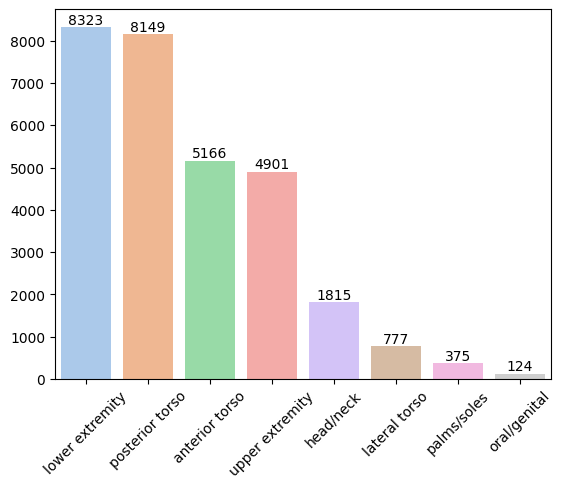

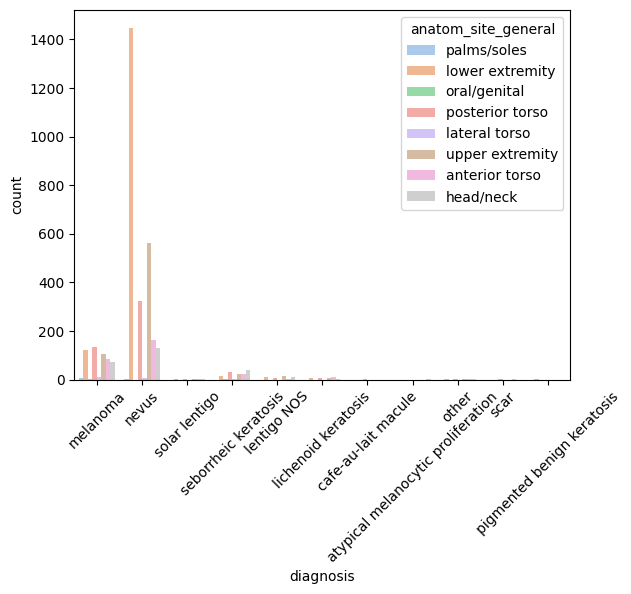

PADUFES_20
 Lesion/s with anatomical site detailed:  1641
 Corresponding %:  100.0


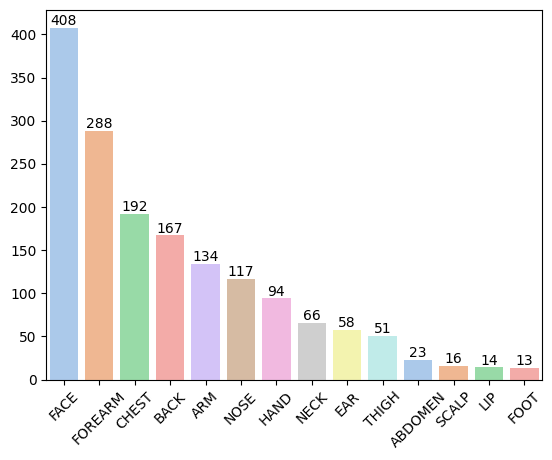

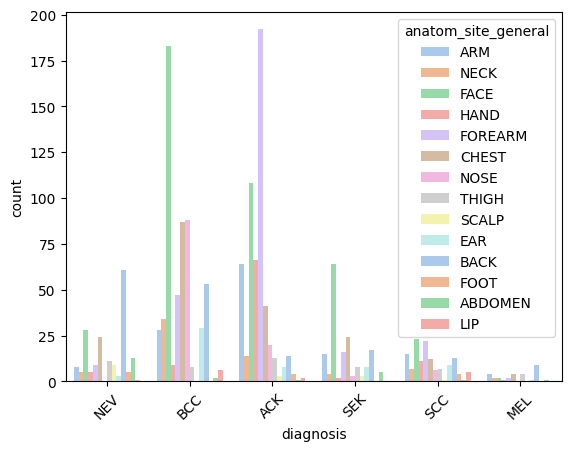

HIBA
 Lesion/s with anatomical site detailed:  1146
 Corresponding %:  91.97431781701445


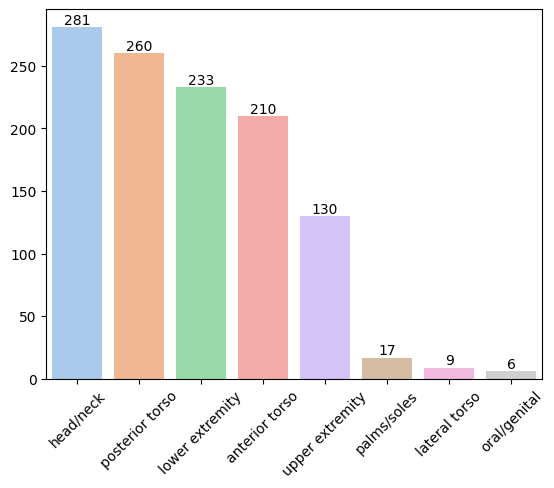

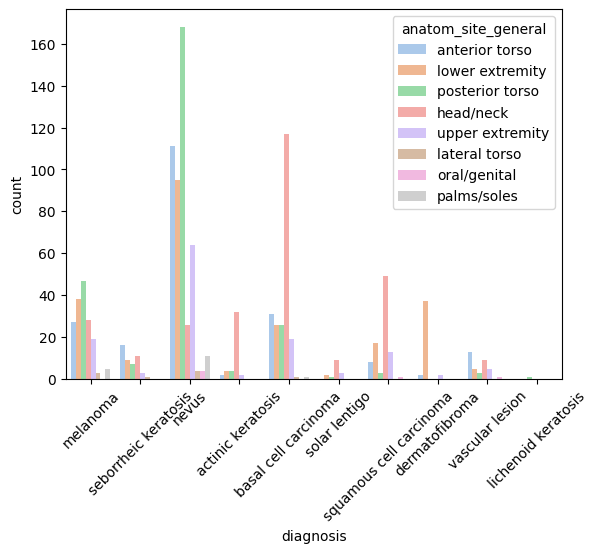

In [ ]:
print('General Anatomical Site (LESION ANALYSIS)\n')

for i,ds in enumerate(datasets.keys()):
  if ds!='ISIC_19':
    df= datasets[ds].copy()
    df.drop_duplicates(['lesion_id'], inplace=True)
    if ds =='PADUFES_20':
      df.rename(columns={'region':'anatom_site_general', 'diagnostic':'diagnosis'}, inplace=True)


    print(ds)

    try:
      print(' Lesion/s with anatomical site detailed: ', df.anatom_site_general.value_counts().sum())
      print(' Corresponding %: ', df.anatom_site_general.value_counts().sum()/len(df)*100)
    except:
      pass

    ax = sns.barplot(x=df.anatom_site_general.value_counts(dropna=False).keys(), y=df.anatom_site_general.value_counts(dropna=False).values, data=df, palette='pastel')
    _ = ax.bar_label(ax.containers[0])
    for item in ax.get_xticklabels():
      item.set_rotation(45)
    plt.show()
    ax = sns.countplot(x='diagnosis', hue='anatom_site_general', data=df, palette='pastel')
    for item in ax.get_xticklabels():
      item.set_rotation(45)
    plt.show()